# Improving the model's accuracy

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from tqdm import tqdm
from statistics import mean
import warnings
warnings.filterwarnings('ignore')

In [2]:
hp_oHe = pd.read_csv("harryPotterCleanOHE.csv")
hp_oHe.columns

Index(['Unnamed: 0', 'month', 'day', 'year', 'hour', 'minute', 'holiday',
       'day.1', 'Pandemic', 'temperature', 'humidity', 'pressure',
       'heavy intensity rain', 'light rain', 'broken clouds', 'moderate rain',
       'mist', 'overcast clouds', 'clear sky', 'scattered clouds',
       'thunderstorm with rain', 'few clouds', 'thunderstorm', 'shower rain',
       'very heavy rain', 'fog', 'haze', 'thunderstorm with light rain',
       'light intensity drizzle', 'Harry_Potter_and_the_Forbidden'],
      dtype='object')

In [3]:
hp = hp_oHe.iloc[: , 1:]
hp.rename(columns = {'day.1':'dayOfTheWeek'}, inplace = True)
hp.columns

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'Pandemic', 'temperature', 'humidity', 'pressure',
       'heavy intensity rain', 'light rain', 'broken clouds', 'moderate rain',
       'mist', 'overcast clouds', 'clear sky', 'scattered clouds',
       'thunderstorm with rain', 'few clouds', 'thunderstorm', 'shower rain',
       'very heavy rain', 'fog', 'haze', 'thunderstorm with light rain',
       'light intensity drizzle', 'Harry_Potter_and_the_Forbidden'],
      dtype='object')

array([[<AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'hour'}>,
        <AxesSubplot:title={'center':'minute'}>],
       [<AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'dayOfTheWeek'}>,
        <AxesSubplot:title={'center':'Pandemic'}>,
        <AxesSubplot:title={'center':'temperature'}>,
        <AxesSubplot:title={'center':'humidity'}>],
       [<AxesSubplot:title={'center':'pressure'}>,
        <AxesSubplot:title={'center':'heavy intensity rain'}>,
        <AxesSubplot:title={'center':'light rain'}>,
        <AxesSubplot:title={'center':'broken clouds'}>,
        <AxesSubplot:title={'center':'moderate rain'}>],
       [<AxesSubplot:title={'center':'mist'}>,
        <AxesSubplot:title={'center':'overcast clouds'}>,
        <AxesSubplot:title={'center':'clear sky'}>,
        <AxesSubplot:title={'center':'scattered clouds'}>,
    

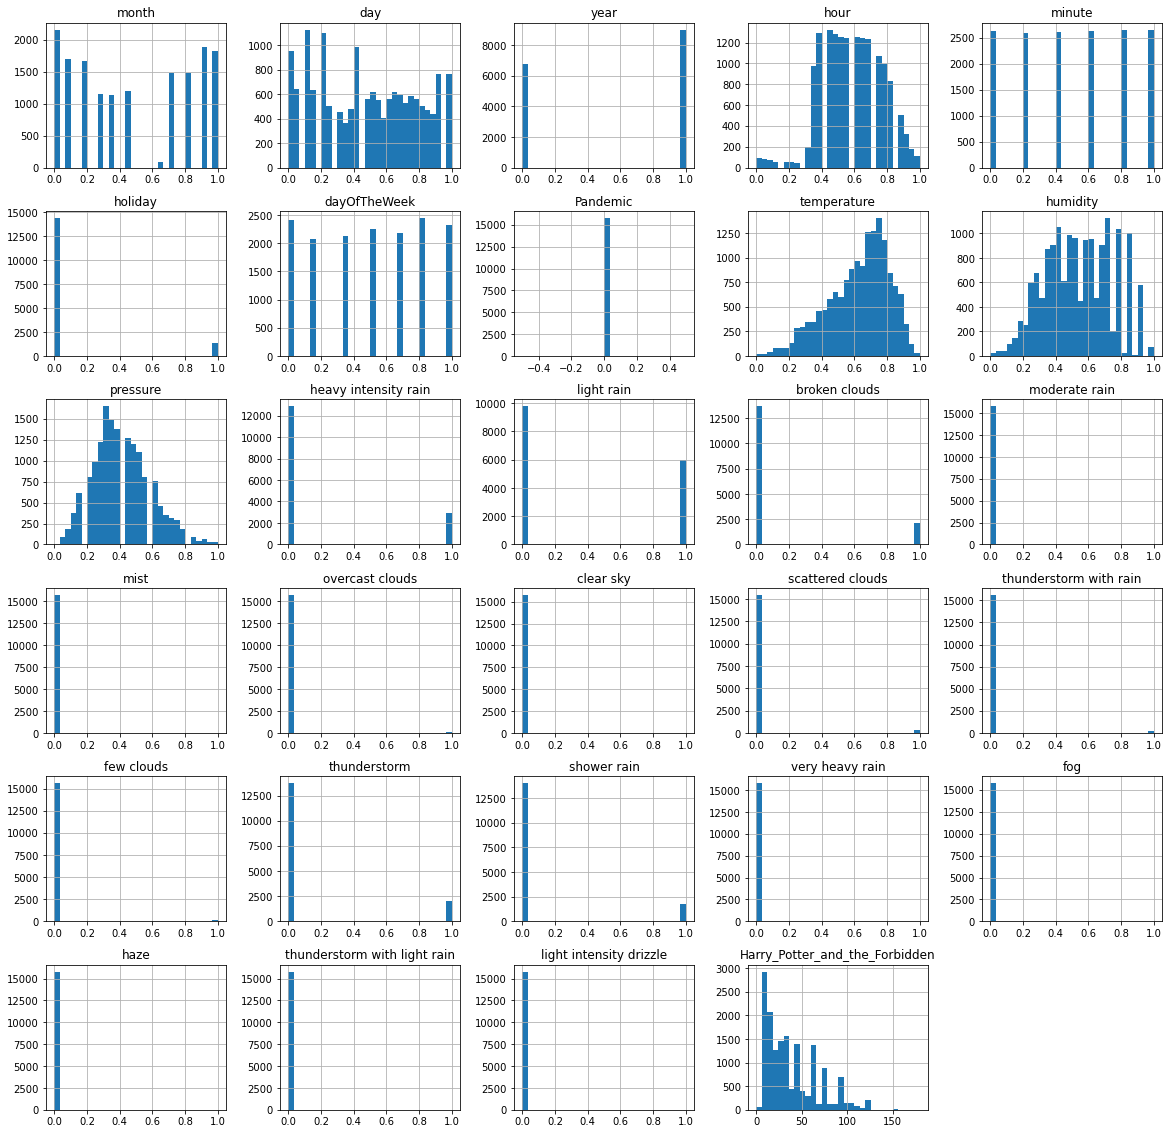

In [4]:
hp.hist(bins=30,figsize=(20,20))

In [5]:
hp.describe()

,month,day,year,hour,minute,holiday,dayOfTheWeek,Pandemic,temperature,humidity,...,thunderstorm with rain,few clouds,thunderstorm,shower rain,very heavy rain,fog,haze,thunderstorm with light rain,light intensity drizzle,Harry_Potter_and_the_Forbidden
count,15785.000000,15785.000000,15785.000000,15785.000000,15785.000000,15785.000000,15785.000000,15785.0,15785.000000,15785.000000,...,15785.00000,15785.000000,15785.000000,15785.000000,15785.00000,15785.000000,15785.000000,15785.000000,15785.000000,15768.000000
mean,0.482771,0.481153,0.571365,0.583719,0.501844,0.086158,0.505712,0.0,0.625539,0.541226,...,0.01020,0.011847,0.130820,0.113716,0.00114,0.002471,0.000063,0.000190,0.000190,37.975393
std,0.362257,0.290517,0.494896,0.183248,0.342226,0.280606,0.337704,0.0,0.186250,0.204494,...,0.10048,0.108199,0.337215,0.317476,0.03375,0.049646,0.007959,0.013785,0.013785,27.709467
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.181818,0.233333,0.000000,0.434783,0.200000,0.000000,0.166667,0.0,0.502985,0.382716,...,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,15.000000
50%,0.454545,0.500000,1.000000,0.565217,0.600000,0.000000,0.500000,0.0,0.662985,0.530864,...,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,30.000000
75%,0.818182,0.733333,1.000000,0.739130,0.800000,0.000000,0.833333,0.0,0.763881,0.703704,...,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,55.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,180.000000


In [6]:
print(sorted(Counter(hp['light intensity drizzle']).items()))
for i in range(1,27):
    print(sorted(Counter(hp.iloc[:,i]).items()),'\n')

[(0.0, 15782), (1.0, 3)]
[(0.0, 409), (0.0333333333333333, 546), (0.0666666666666666, 641), (0.1, 600), (0.1333333333333333, 530), (0.1666666666666666, 637), (0.2, 558), (0.2333333333333333, 541), (0.2666666666666666, 507), (0.3, 457), (0.3333333333333333, 367), (0.3666666666666667, 477), (0.4, 503), (0.4333333333333333, 482), (0.4666666666666667, 558), (0.5, 616), (0.5333333333333333, 552), (0.5666666666666667, 405), (0.6, 563), (0.6333333333333333, 621), (0.6666666666666666, 592), (0.7, 531), (0.7333333333333333, 586), (0.7666666666666667, 565), (0.8, 503), (0.8333333333333334, 469), (0.8666666666666667, 439), (0.9, 394), (0.9333333333333332, 368), (0.9666666666666668, 379), (1.0, 389)] 

[(0.0, 6766), (1.0, 9019)] 

[(0.0, 95), (0.0434782608695652, 84), (0.0869565217391304, 70), (0.1304347826086956, 56), (0.1739130434782608, 52), (0.217391304347826, 52), (0.2608695652173913, 48), (0.3043478260869565, 199), (0.3478260869565217, 978), (0.3913043478260869, 1293), (0.4347826086956521, 1

In [7]:
hp.isnull().values.any()

True

In [8]:
hp.isnull().sum()

month                              0
day                                0
year                               0
hour                               0
minute                             0
holiday                            0
dayOfTheWeek                       0
Pandemic                           0
temperature                        0
humidity                           0
pressure                           0
heavy intensity rain               0
light rain                         0
broken clouds                      0
moderate rain                      0
mist                               0
overcast clouds                    0
clear sky                          0
scattered clouds                   0
thunderstorm with rain             0
few clouds                         0
thunderstorm                       0
shower rain                        0
very heavy rain                    0
fog                                0
haze                               0
thunderstorm with light rain       0
l

In [9]:
hp.drop(hp.tail(17).index,inplace=True) 

In [10]:
hp.isnull().sum()

month                             0
day                               0
year                              0
hour                              0
minute                            0
holiday                           0
dayOfTheWeek                      0
Pandemic                          0
temperature                       0
humidity                          0
pressure                          0
heavy intensity rain              0
light rain                        0
broken clouds                     0
moderate rain                     0
mist                              0
overcast clouds                   0
clear sky                         0
scattered clouds                  0
thunderstorm with rain            0
few clouds                        0
thunderstorm                      0
shower rain                       0
very heavy rain                   0
fog                               0
haze                              0
thunderstorm with light rain      0
light intensity drizzle     

# Testing model with 4 classes 

So far we have cleaned the dataset from nulls and changed the name of a variable to day of the week which is way better to day.1. Now let's change the classes within the target variables, instead of deleting the ouliners, lets group them in four classes:
-Up to 30 min          (1)
-From 30 to 60 min     (2)
-from 60 to 120 mins   (3)
-More than 120 mins    (4)

In [17]:
sorted(hp.Harry_Potter_and_the_Forbidden.unique())

[0.0,
 5.0,
 10.0,
 11.0,
 15.0,
 20.0,
 25.0,
 30.0,
 35.0,
 40.0,
 45.0,
 50.0,
 55.0,
 60.0,
 65.0,
 70.0,
 75.0,
 80.0,
 85.0,
 90.0,
 95.0,
 100.0,
 105.0,
 110.0,
 115.0,
 120.0,
 125.0,
 130.0,
 135.0,
 145.0,
 150.0,
 180.0]

I don't like there is a 0 mins value, so I will trim it

In [19]:
hp.query('Harry_Potter_and_the_Forbidden == 0')

,month,day,year,hour,minute,holiday,dayOfTheWeek,Pandemic,temperature,humidity,...,thunderstorm with rain,few clouds,thunderstorm,shower rain,very heavy rain,fog,haze,thunderstorm with light rain,light intensity drizzle,Harry_Potter_and_the_Forbidden
13905,0.363636,0.633333,1.0,0.869565,0.8,0.0,0.666667,0.0,0.617612,0.604938,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
hp = hp[hp.Harry_Potter_and_the_Forbidden != 0] #delete rows with 0 min

In [12]:
sorted(hp.Harry_Potter_and_the_Forbidden.unique())

[5.0,
 10.0,
 11.0,
 15.0,
 20.0,
 25.0,
 30.0,
 35.0,
 40.0,
 45.0,
 50.0,
 55.0,
 60.0,
 65.0,
 70.0,
 75.0,
 80.0,
 85.0,
 90.0,
 95.0,
 100.0,
 105.0,
 110.0,
 115.0,
 120.0,
 125.0,
 130.0,
 135.0,
 145.0,
 150.0,
 180.0]

Perfect, now let's do the arrangement as we planned before

In [22]:
#Replace times ending in 5 and also compacting the rest to have only 6 classes
a=hp.Harry_Potter_and_the_Forbidden.replace([
5, 10, 11, 15, 20, 25, 30, 35, 40, 45,50.0,55.0,60.0,65.0,70.0,75.0,80.0,85.0,90.0,95.0,100.0,105.0,110.0,115.0,120.0,125.0,130.0,135.0,145.0,150.0,180.0], 
[1,1,  1,  1,  1,  1,  1,  2,  2,  2, 2,   2,   2,   3,   3,   3,   3,   3,   3,   3,   3,    3,    3,    3,     3,    4,   4,    4,     4,    4,    4])


In [24]:
df=pd.DataFrame(a)
df.rename(columns = {'Harry_Potter_and_the_Forbidden':'HP_Forbidden_clean'}, inplace = True)
df.head()

,HP_Forbidden_clean
0,2.0
1,2.0
2,2.0
3,2.0
4,1.0


In [25]:
hp_bis=pd.concat([hp, df], axis=1)
hp_bis

,month,day,year,hour,minute,holiday,dayOfTheWeek,Pandemic,temperature,humidity,...,few clouds,thunderstorm,shower rain,very heavy rain,fog,haze,thunderstorm with light rain,light intensity drizzle,Harry_Potter_and_the_Forbidden,HP_Forbidden_clean
0,0.636364,0.966667,0.0,0.608696,0.4,0.0,0.000000,0.0,0.721791,0.740741,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,2.0
1,0.636364,0.966667,0.0,0.608696,0.6,0.0,0.000000,0.0,0.721791,0.740741,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,2.0
2,0.636364,0.966667,0.0,0.608696,0.8,0.0,0.000000,0.0,0.711940,0.679012,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,2.0
3,0.636364,0.966667,0.0,0.608696,1.0,0.0,0.000000,0.0,0.723881,0.679012,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,2.0
4,0.636364,0.966667,0.0,0.652174,0.0,0.0,0.000000,0.0,0.724179,0.679012,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15763,0.454545,0.800000,1.0,0.826087,0.4,0.0,0.833333,0.0,0.634627,0.728395,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,2.0
15764,0.454545,0.800000,1.0,0.826087,0.6,0.0,0.833333,0.0,0.634030,0.716049,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,2.0
15765,0.454545,0.800000,1.0,0.826087,0.8,0.0,0.833333,0.0,0.631940,0.716049,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,25.0,1.0
15766,0.454545,0.800000,1.0,0.826087,1.0,0.0,0.833333,0.0,0.628657,0.716049,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,10.0,1.0


In [26]:
hp = hp_bis.drop('Harry_Potter_and_the_Forbidden',axis=1)
hp.HP_Forbidden_clean.unique()

array([2., 1., 3., 4.])

<AxesSubplot:>

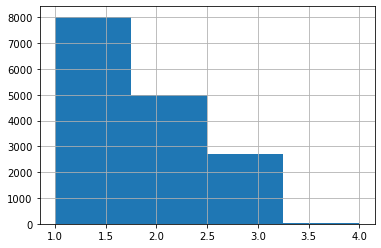

In [29]:
hp["HP_Forbidden_clean"].hist(bins=4)

In [30]:
hp.to_csv("HP_OHE_4class.csv")

Now, lets oversample with SMOTE our dataset as it is extremely imbalanced

In [20]:
def getXandY(df):
    df.drop(df.tail(20).index,inplace=True) 
    x = df.drop(['HP_Forbidden_clean'],axis=1)
    y = df.HP_Forbidden_clean
    return(x,y)

def trainTest(x,y):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, shuffle=True)
    return(X_train, X_test, y_train, y_test)

In [23]:
smote = SMOTE(random_state=42)
X,Y=getXandY(hp)
X_train, X_test, y_train, y_test = trainTest(X,Y)
X_train_Smote, y_train_Smote= smote.fit_resample(X_train, y_train)
print(sorted(Counter(y_train_Smote).items()))

KeyError: "['HP_Forbidden_clean'] not found in axis"

In [41]:
logisticRegr = LogisticRegression(max_iter=20000)
logisticRegr.fit(X_train_Smote, y_train_Smote)
y_pred=logisticRegr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.71      0.60      0.65      2393
         2.0       0.49      0.42      0.45      1481
         3.0       0.28      0.38      0.32       827
         4.0       0.01      0.33      0.01         6

    accuracy                           0.50      4707
   macro avg       0.37      0.43      0.36      4707
weighted avg       0.56      0.50      0.53      4707



Our model has improved from 30% accuracy to 50%, but this is not statistically significant, so, let's use the variables that MRMR suggested and also let's repeat the process 100 times.

# 4 classes with MRMR

In [46]:
mrmrO = ['month',	'day',	'year']

X_train_Smot_r = X_train_Smote[mrmrO]
X_test_r = X_test[mrmrO]


In [47]:
logisticRegr = LogisticRegression(max_iter=20000)
logisticRegr.fit(X_train_Smot_r, y_train_Smote)
y_pred=logisticRegr.predict(X_test_r)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.64      0.62      0.63      2393
         2.0       0.50      0.49      0.50      1481
         3.0       0.17      0.08      0.11       827
         4.0       0.00      0.33      0.01         6

    accuracy                           0.48      4707
   macro avg       0.33      0.38      0.31      4707
weighted avg       0.51      0.48      0.50      4707



Unfortunatelly, as the noFreeLuch theorem says, with new the class construction, this configuration is not optimal, so let's repeat the analysis of which MRMR vars are the best

In [25]:
mrmrO = ['month',	'day',	'year',	'hour',	'minute',	'holiday',	'dayOfTheWeek',	'temperature',	'humidity',	'pressure',	'heavy intensity rain',	'light rain',	'broken clouds',	'scattered clouds',	'thunderstorm with rain',	'few clouds',	'thunderstorm',	'shower rain',	'heavy intensity rain',	'mist',	'scattered clouds',	'very heavy rain',	'overcast clouds',	'moderate rain',	'minute',	'haze',	'few clouds']

def testModel(df,var_order,n_vars,reps):
    for j in tqdm(range(1,n_vars)):
        #split our dataframe into X and Y
        x,y=getXandY(df)
        #create the lists to store metrics
        acc = []
        rec = []
        preci = []
        f1 = []
        for i in range(reps):
            #split the dataFrame into test and train
            X_train, X_test, y_train, y_test = trainTest(x,y)
            #Oversample the train dataset with SMOTE
            X_train_os, y_train_os=smote.fit_resample(X_train, y_train)
            #define the variables order 
            X_train_os_r = X_train_os[var_order]
            X_test_r = X_test[var_order]
            df1= X_train_os_r.iloc[:, 0:j] #use only part of the variables
            lg = LogisticRegression(max_iter=20000)
            lg.fit(df1, y_train_os).decision_function(X_test_r.iloc[:, 0:j])
            y_pred=lg.predict(X_test_r.iloc[:, 0:j])
            ac=metrics.accuracy_score(y_test, y_pred)
            acc.append(ac)
            p=metrics.precision_score(y_test, y_pred,average='macro')
            preci.append(p)
            r=metrics.recall_score(y_test, y_pred,average='macro')
            rec.append(r)
            f=metrics.f1_score(y_test, y_pred, average='macro')
            f1.append(f)
        print(df1.columns)
        print("For {} features: \n Accuracy: {} \n Precision: {} \n Recall: {} \n F1 score: {}".format(
        j,mean(acc),mean(preci),mean(rec),mean(f1)))
        print(classification_report(y_test, y_pred))

In [60]:
testModel(hp,mrmrO,28,25)

  4%|▎         | 1/27 [00:07<03:23,  7.84s/it]

Index(['month'], dtype='object')
For 1 features: 
 Accuracy: 0.2943510797519778 
 Precision: 0.14934120521288016 
 Recall: 0.3439642242089926 
 F1 score: 0.1520427521656889
              precision    recall  f1-score   support

         1.0       0.49      0.55      0.52      2378
         2.0       0.00      0.00      0.00      1531
         3.0       0.08      0.05      0.06       762
         4.0       0.00      0.67      0.01         6

    accuracy                           0.29      4677
   macro avg       0.14      0.32      0.15      4677
weighted avg       0.26      0.29      0.27      4677



  7%|▋         | 2/27 [00:16<03:23,  8.15s/it]

Index(['month', 'day'], dtype='object')
For 2 features: 
 Accuracy: 0.3414857632198673 
 Precision: 0.27720757364878085 
 Recall: 0.4057989474546472 
 F1 score: 0.2331809123174246
              precision    recall  f1-score   support

         1.0       0.56      0.51      0.53      2392
         2.0       0.42      0.17      0.24      1425
         3.0       0.13      0.09      0.11       844
         4.0       0.01      1.00      0.01        10

    accuracy                           0.33      4671
   macro avg       0.28      0.44      0.22      4671
weighted avg       0.44      0.33      0.36      4671



 11%|█         | 3/27 [00:30<04:20, 10.85s/it]

Index(['month', 'day', 'year'], dtype='object')
For 3 features: 
 Accuracy: 0.4446988210075027 
 Precision: 0.33363503124993904 
 Recall: 0.44987165004608176 
 F1 score: 0.2923892149091387
              precision    recall  f1-score   support

         1.0       0.67      0.60      0.63      2471
         2.0       0.49      0.46      0.48      1417
         3.0       0.23      0.06      0.10       773
         4.0       0.00      0.75      0.01         4

    accuracy                           0.47      4665
   macro avg       0.35      0.47      0.30      4665
weighted avg       0.55      0.47      0.50      4665



 15%|█▍        | 4/27 [00:47<05:08, 13.43s/it]

Index(['month', 'day', 'year', 'hour'], dtype='object')
For 4 features: 
 Accuracy: 0.43915003219575016 
 Precision: 0.3568210867375738 
 Recall: 0.47410804454144323 
 F1 score: 0.3213681039193878
              precision    recall  f1-score   support

         1.0       0.68      0.55      0.61      2395
         2.0       0.51      0.43      0.47      1475
         3.0       0.24      0.29      0.26       782
         4.0       0.01      0.57      0.01         7

    accuracy                           0.47      4659
   macro avg       0.36      0.46      0.34      4659
weighted avg       0.55      0.47      0.51      4659



 19%|█▊        | 5/27 [01:05<05:32, 15.14s/it]

Index(['month', 'day', 'year', 'hour', 'minute'], dtype='object')
For 5 features: 
 Accuracy: 0.4306640876853643 
 Precision: 0.3531155499323854 
 Recall: 0.46604293002734887 
 F1 score: 0.3171452824752694
              precision    recall  f1-score   support

         1.0       0.67      0.55      0.60      2373
         2.0       0.51      0.38      0.44      1452
         3.0       0.25      0.23      0.24       822
         4.0       0.00      0.67      0.01         6

    accuracy                           0.44      4653
   macro avg       0.36      0.46      0.32      4653
weighted avg       0.54      0.44      0.49      4653



 22%|██▏       | 6/27 [01:24<05:41, 16.25s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday'], dtype='object')
For 6 features: 
 Accuracy: 0.48539703034215625 
 Precision: 0.3580756109937209 
 Recall: 0.49164963675209544 
 F1 score: 0.3415873340582441
              precision    recall  f1-score   support

         1.0       0.69      0.60      0.64      2406
         2.0       0.50      0.45      0.48      1448
         3.0       0.26      0.29      0.27       784
         4.0       0.02      0.56      0.03         9

    accuracy                           0.50      4647
   macro avg       0.36      0.48      0.36      4647
weighted avg       0.55      0.50      0.53      4647



 26%|██▌       | 7/27 [01:44<05:54, 17.72s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek'], dtype='object')
For 7 features: 
 Accuracy: 0.5005817711700065 
 Precision: 0.3666515552235668 
 Recall: 0.5025423613957145 
 F1 score: 0.35072422958884486
              precision    recall  f1-score   support

         1.0       0.70      0.61      0.65      2376
         2.0       0.52      0.46      0.49      1497
         3.0       0.21      0.21      0.21       763
         4.0       0.01      1.00      0.02         5

    accuracy                           0.49      4641
   macro avg       0.36      0.57      0.34      4641
weighted avg       0.56      0.49      0.52      4641



 30%|██▉       | 8/27 [02:22<07:39, 24.16s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature'],
      dtype='object')
For 8 features: 
 Accuracy: 0.5107831715210356 
 Precision: 0.37098909603139185 
 Recall: 0.5362967454331358 
 F1 score: 0.36063184153020567
              precision    recall  f1-score   support

         1.0       0.71      0.60      0.65      2392
         2.0       0.50      0.45      0.47      1408
         3.0       0.25      0.29      0.27       830
         4.0       0.01      1.00      0.03         5

    accuracy                           0.50      4635
   macro avg       0.37      0.58      0.35      4635
weighted avg       0.56      0.50      0.53      4635



 33%|███▎      | 9/27 [03:06<09:05, 30.30s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity'],
      dtype='object')
For 9 features: 
 Accuracy: 0.5127759775329445 
 Precision: 0.3749264290394889 
 Recall: 0.5346361600458556 
 F1 score: 0.36465228645960496
              precision    recall  f1-score   support

         1.0       0.71      0.61      0.66      2408
         2.0       0.52      0.46      0.49      1443
         3.0       0.23      0.30      0.26       773
         4.0       0.01      1.00      0.03         5

    accuracy                           0.51      4629
   macro avg       0.37      0.59      0.36      4629
weighted avg       0.57      0.51      0.54      4629



 37%|███▋      | 10/27 [03:52<09:58, 35.19s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity', 'pressure'],
      dtype='object')
For 10 features: 
 Accuracy: 0.5119705818732425 
 Precision: 0.37436573172363125 
 Recall: 0.5258487458051282 
 F1 score: 0.36310931039530203
              precision    recall  f1-score   support

         1.0       0.70      0.59      0.64      2392
         2.0       0.49      0.42      0.45      1446
         3.0       0.23      0.34      0.28       781
         4.0       0.00      0.25      0.01         4

    accuracy                           0.49      4623
   macro avg       0.36      0.40      0.34      4623
weighted avg       0.56      0.49      0.52      4623



 41%|████      | 11/27 [04:39<10:17, 38.62s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity', 'pressure', 'heavy intensity rain'],
      dtype='object')
For 11 features: 
 Accuracy: 0.5123760017327269 
 Precision: 0.37328095201124545 
 Recall: 0.5154919757965127 
 F1 score: 0.3624614550337269
              precision    recall  f1-score   support

         1.0       0.71      0.61      0.66      2384
         2.0       0.47      0.44      0.45      1409
         3.0       0.25      0.31      0.28       816
         4.0       0.03      0.88      0.05         8

    accuracy                           0.50      4617
   macro avg       0.37      0.56      0.36      4617
weighted avg       0.56      0.50      0.53      4617



 44%|████▍     | 12/27 [05:28<10:29, 41.95s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity', 'pressure', 'heavy intensity rain',
       'light rain'],
      dtype='object')
For 12 features: 
 Accuracy: 0.5108045977011494 
 Precision: 0.3731057959212283 
 Recall: 0.5352056410658875 
 F1 score: 0.363845291896844
              precision    recall  f1-score   support

         1.0       0.71      0.58      0.64      2385
         2.0       0.52      0.47      0.49      1441
         3.0       0.26      0.35      0.30       778
         4.0       0.02      0.86      0.04         7

    accuracy                           0.51      4611
   macro avg       0.38      0.56      0.37      4611
weighted avg       0.58      0.51      0.54      4611



 48%|████▊     | 13/27 [06:19<10:23, 44.53s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity', 'pressure', 'heavy intensity rain',
       'light rain', 'broken clouds'],
      dtype='object')
For 13 features: 
 Accuracy: 0.5171769815418024 
 Precision: 0.3779990573657067 
 Recall: 0.5271395008497919 
 F1 score: 0.36969291630017664
              precision    recall  f1-score   support

         1.0       0.72      0.59      0.65      2378
         2.0       0.50      0.48      0.49      1445
         3.0       0.29      0.38      0.33       775
         4.0       0.01      0.43      0.02         7

    accuracy                           0.52      4605
   macro avg       0.38      0.47      0.37      4605
weighted avg       0.58      0.52      0.54      4605



 52%|█████▏    | 14/27 [07:10<10:05, 46.59s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity', 'pressure', 'heavy intensity rain',
       'light rain', 'broken clouds', 'scattered clouds'],
      dtype='object')
For 14 features: 
 Accuracy: 0.5109719504240052 
 Precision: 0.3734050313373765 
 Recall: 0.5631837798022464 
 F1 score: 0.36471652735096044
              precision    recall  f1-score   support

         1.0       0.72      0.59      0.65      2370
         2.0       0.48      0.46      0.47      1451
         3.0       0.29      0.38      0.33       772
         4.0       0.01      0.50      0.02         6

    accuracy                           0.51      4599
   macro avg       0.38      0.48      0.37      4599
weighted avg       0.57      0.51      0.54      4599



 56%|█████▌    | 15/27 [08:03<09:41, 48.47s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity', 'pressure', 'heavy intensity rain',
       'light rain', 'broken clouds', 'scattered clouds',
       'thunderstorm with rain'],
      dtype='object')
For 15 features: 
 Accuracy: 0.5166035271064664 
 Precision: 0.3762957849893276 
 Recall: 0.54768203956722 
 F1 score: 0.36884529299400637
              precision    recall  f1-score   support

         1.0       0.71      0.58      0.64      2327
         2.0       0.49      0.46      0.47      1470
         3.0       0.26      0.34      0.30       790
         4.0       0.02      0.83      0.03         6

    accuracy                           0.50      4593
   macro avg       0.37      0.55      0.36      4593
weighted avg       0.56      0.50      0.53      4593



 59%|█████▉    | 16/27 [08:58<09:15, 50.52s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity', 'pressure', 'heavy intensity rain',
       'light rain', 'broken clouds', 'scattered clouds',
       'thunderstorm with rain', 'few clouds'],
      dtype='object')
For 16 features: 
 Accuracy: 0.5138173097885328 
 Precision: 0.37414904871451266 
 Recall: 0.5378438156571237 
 F1 score: 0.36672983732233727
              precision    recall  f1-score   support

         1.0       0.71      0.58      0.64      2344
         2.0       0.50      0.48      0.49      1444
         3.0       0.26      0.34      0.30       791
         4.0       0.02      0.62      0.04         8

    accuracy                           0.51      4587
   macro avg       0.37      0.51      0.37      4587
weighted avg       0.57      0.51      0.53      4587



 63%|██████▎   | 17/27 [09:53<08:38, 51.85s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity', 'pressure', 'heavy intensity rain',
       'light rain', 'broken clouds', 'scattered clouds',
       'thunderstorm with rain', 'few clouds', 'thunderstorm'],
      dtype='object')
For 17 features: 
 Accuracy: 0.5196856581532416 
 Precision: 0.379851517604996 
 Recall: 0.5529623409513943 
 F1 score: 0.3727167602376208
              precision    recall  f1-score   support

         1.0       0.74      0.61      0.67      2405
         2.0       0.50      0.47      0.48      1381
         3.0       0.27      0.34      0.30       790
         4.0       0.02      1.00      0.03         5

    accuracy                           0.52      4581
   macro avg       0.38      0.61      0.37      4581
weighted avg       0.58      0.52      0.55      4581



 67%|██████▋   | 18/27 [10:52<08:05, 53.93s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity', 'pressure', 'heavy intensity rain',
       'light rain', 'broken clouds', 'scattered clouds',
       'thunderstorm with rain', 'few clouds', 'thunderstorm', 'shower rain'],
      dtype='object')
For 18 features: 
 Accuracy: 0.518111475409836 
 Precision: 0.3773027063359143 
 Recall: 0.5346178341282327 
 F1 score: 0.37031241393868397
              precision    recall  f1-score   support

         1.0       0.73      0.62      0.67      2387
         2.0       0.49      0.49      0.49      1364
         3.0       0.32      0.37      0.34       819
         4.0       0.01      0.60      0.02         5

    accuracy                           0.53      4575
   macro avg       0.39      0.52      0.38      4575
weighted avg       0.59      0.53      0.56      4575



 70%|███████   | 19/27 [11:52<07:26, 55.79s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity', 'pressure', 'heavy intensity rain',
       'light rain', 'broken clouds', 'scattered clouds',
       'thunderstorm with rain', 'few clouds', 'thunderstorm', 'shower rain',
       'heavy intensity rain'],
      dtype='object')
For 19 features: 
 Accuracy: 0.5184766907419567 
 Precision: 0.3770620827319125 
 Recall: 0.5150987481288027 
 F1 score: 0.37018692523854674
              precision    recall  f1-score   support

         1.0       0.72      0.61      0.66      2358
         2.0       0.48      0.44      0.46      1374
         3.0       0.31      0.39      0.35       835
         4.0       0.00      0.50      0.01         2

    accuracy                           0.52      4569
   macro avg       0.38      0.48      0.37      4569
weighted avg       0.57      0.52      0.54      4569



 74%|███████▍  | 20/27 [12:52<06:38, 56.88s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity', 'pressure', 'heavy intensity rain',
       'light rain', 'broken clouds', 'scattered clouds',
       'thunderstorm with rain', 'few clouds', 'thunderstorm', 'shower rain',
       'heavy intensity rain', 'mist'],
      dtype='object')
For 20 features: 
 Accuracy: 0.5183870260793337 
 Precision: 0.37677289285428284 
 Recall: 0.5352461611438697 
 F1 score: 0.36985175103933005
              precision    recall  f1-score   support

         1.0       0.72      0.61      0.66      2328
         2.0       0.49      0.44      0.46      1430
         3.0       0.28      0.35      0.31       800
         4.0       0.02      1.00      0.04         5

    accuracy                           0.51      4563
   macro avg       0.38      0.60      0.37      4563
weighted avg       0.57      0.51      0.54      4563



 78%|███████▊  | 21/27 [13:52<05:47, 57.87s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity', 'pressure', 'heavy intensity rain',
       'light rain', 'broken clouds', 'scattered clouds',
       'thunderstorm with rain', 'few clouds', 'thunderstorm', 'shower rain',
       'heavy intensity rain', 'mist', 'scattered clouds'],
      dtype='object')
For 21 features: 
 Accuracy: 0.5185780118499013 
 Precision: 0.3779021590172348 
 Recall: 0.5303767275016391 
 F1 score: 0.37071319631159955
              precision    recall  f1-score   support

         1.0       0.73      0.61      0.66      2387
         2.0       0.49      0.45      0.47      1383
         3.0       0.30      0.40      0.34       780
         4.0       0.02      0.57      0.03         7

    accuracy                           0.53      4557
   macro avg       0.38      0.51      0.38      4557
weighted avg       0.58      0.53      0.55      4557



 81%|████████▏ | 22/27 [14:51<04:51, 58.31s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity', 'pressure', 'heavy intensity rain',
       'light rain', 'broken clouds', 'scattered clouds',
       'thunderstorm with rain', 'few clouds', 'thunderstorm', 'shower rain',
       'heavy intensity rain', 'mist', 'scattered clouds', 'very heavy rain'],
      dtype='object')
For 22 features: 
 Accuracy: 0.5184179301252472 
 Precision: 0.3787674141450345 
 Recall: 0.5329224923278368 
 F1 score: 0.37165638645717347
              precision    recall  f1-score   support

         1.0       0.73      0.60      0.66      2406
         2.0       0.50      0.49      0.49      1361
         3.0       0.28      0.37      0.32       773
         4.0       0.04      0.82      0.07        11

    accuracy                           0.53      4551
   macro avg       0.39      0.57      0.39      4551
weighted avg       0.59      0.53      0.55      4551



 85%|████████▌ | 23/27 [15:54<03:59, 59.85s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity', 'pressure', 'heavy intensity rain',
       'light rain', 'broken clouds', 'scattered clouds',
       'thunderstorm with rain', 'few clouds', 'thunderstorm', 'shower rain',
       'heavy intensity rain', 'mist', 'scattered clouds', 'very heavy rain',
       'overcast clouds'],
      dtype='object')
For 23 features: 
 Accuracy: 0.5168844884488449 
 Precision: 0.37787705873554844 
 Recall: 0.5311650441003671 
 F1 score: 0.37109600569436535
              precision    recall  f1-score   support

         1.0       0.73      0.61      0.66      2387
         2.0       0.49      0.46      0.47      1381
         3.0       0.29      0.43      0.35       769
         4.0       0.02      0.38      0.04         8

    accuracy                           0.53      4545
   macro avg       0.38      0.47      0.38      4545
weighted avg       0.58      0.53      0.55      4545



 89%|████████▉ | 24/27 [16:56<03:01, 60.35s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity', 'pressure', 'heavy intensity rain',
       'light rain', 'broken clouds', 'scattered clouds',
       'thunderstorm with rain', 'few clouds', 'thunderstorm', 'shower rain',
       'heavy intensity rain', 'mist', 'scattered clouds', 'very heavy rain',
       'overcast clouds', 'moderate rain'],
      dtype='object')
For 24 features: 
 Accuracy: 0.5166424322538004 
 Precision: 0.3760095519958154 
 Recall: 0.528265688307824 
 F1 score: 0.3680378722551496
              precision    recall  f1-score   support

         1.0       0.72      0.61      0.66      2346
         2.0       0.50      0.44      0.47      1405
         3.0       0.28      0.41      0.33       785
         4.0       0.00      0.33      0.01         3

    accuracy                           0.52      4539
   macro avg       0.38      0.45      0.37      4539
weighted avg       0.58      0.52      0.54      4539



 93%|█████████▎| 25/27 [18:00<02:02, 61.47s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity', 'pressure', 'heavy intensity rain',
       'light rain', 'broken clouds', 'scattered clouds',
       'thunderstorm with rain', 'few clouds', 'thunderstorm', 'shower rain',
       'heavy intensity rain', 'mist', 'scattered clouds', 'very heavy rain',
       'overcast clouds', 'moderate rain', 'minute'],
      dtype='object')
For 25 features: 
 Accuracy: 0.5150408118243989 
 Precision: 0.3768954509130526 
 Recall: 0.5298402486131588 
 F1 score: 0.37008790920535883
              precision    recall  f1-score   support

         1.0       0.73      0.61      0.66      2346
         2.0       0.52      0.46      0.49      1386
         3.0       0.28      0.40      0.33       791
         4.0       0.03      0.60      0.06        10

    accuracy                           0.53      4533
   macro avg       0.39      0.52      0.38      4533
weighted avg       0.58      0.53      0.55

 96%|█████████▋| 26/27 [19:05<01:02, 62.52s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity', 'pressure', 'heavy intensity rain',
       'light rain', 'broken clouds', 'scattered clouds',
       'thunderstorm with rain', 'few clouds', 'thunderstorm', 'shower rain',
       'heavy intensity rain', 'mist', 'scattered clouds', 'very heavy rain',
       'overcast clouds', 'moderate rain', 'minute', 'haze'],
      dtype='object')
For 26 features: 
 Accuracy: 0.5159178263750829 
 Precision: 0.37744643285581464 
 Recall: 0.5392295224299519 
 F1 score: 0.37038340143519494
              precision    recall  f1-score   support

         1.0       0.71      0.60      0.65      2326
         2.0       0.48      0.44      0.46      1369
         3.0       0.26      0.31      0.28       827
         4.0       0.02      1.00      0.03         5

    accuracy                           0.50      4527
   macro avg       0.37      0.59      0.36      4527
weighted avg       0.56      0.50 

100%|██████████| 27/27 [20:11<00:00, 44.88s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity', 'pressure', 'heavy intensity rain',
       'light rain', 'broken clouds', 'scattered clouds',
       'thunderstorm with rain', 'few clouds', 'thunderstorm', 'shower rain',
       'heavy intensity rain', 'mist', 'scattered clouds', 'very heavy rain',
       'overcast clouds', 'moderate rain', 'minute', 'haze', 'few clouds'],
      dtype='object')
For 27 features: 
 Accuracy: 0.5171333775713338 
 Precision: 0.37860925651441363 
 Recall: 0.5411430530777726 
 F1 score: 0.3706181604191423
              precision    recall  f1-score   support

         1.0       0.73      0.61      0.66      2321
         2.0       0.52      0.49      0.50      1421
         3.0       0.30      0.46      0.36       771
         4.0       0.05      0.38      0.08         8

    accuracy                           0.54      4521
   macro avg       0.40      0.48      0.40      4521
weighted avg       0.

In [63]:
testModel(hp,mrmrO,28,reps=100)

  4%|▎         | 1/27 [00:27<11:44, 27.11s/it]

Index(['month'], dtype='object')
For 1 features: 
 Accuracy: 0.30669604519774013 
 Precision: 0.16393438502087188 
 Recall: 0.38214709840769795 
 F1 score: 0.16713211354839788
              precision    recall  f1-score   support

         1.0       0.53      0.54      0.54      2343
         2.0       0.00      0.00      0.00      1310
         3.0       0.09      0.06      0.07       764
         4.0       0.01      1.00      0.01         8

    accuracy                           0.30      4425
   macro avg       0.16      0.40      0.15      4425
weighted avg       0.30      0.30      0.30      4425



  7%|▋         | 2/27 [00:57<12:04, 28.96s/it]

Index(['month', 'day'], dtype='object')
For 2 features: 
 Accuracy: 0.3548970355284001 
 Precision: 0.28157421759191203 
 Recall: 0.4069851896458864 
 F1 score: 0.24229899522863838
              precision    recall  f1-score   support

         1.0       0.60      0.46      0.52      2328
         2.0       0.38      0.27      0.31      1317
         3.0       0.16      0.19      0.18       765
         4.0       0.01      0.67      0.01         9

    accuracy                           0.36      4419
   macro avg       0.29      0.40      0.26      4419
weighted avg       0.46      0.36      0.40      4419



 11%|█         | 3/27 [01:49<15:43, 39.33s/it]

Index(['month', 'day', 'year'], dtype='object')
For 3 features: 
 Accuracy: 0.4184998866983911 
 Precision: 0.3240147923785072 
 Recall: 0.4548709995180223 
 F1 score: 0.277973497674535
              precision    recall  f1-score   support

         1.0       0.66      0.54      0.60      2360
         2.0       0.46      0.51      0.49      1299
         3.0       0.15      0.07      0.10       745
         4.0       0.01      0.67      0.02         9

    accuracy                           0.46      4413
   macro avg       0.32      0.45      0.30      4413
weighted avg       0.51      0.46      0.48      4413



 15%|█▍        | 4/27 [02:54<19:01, 49.63s/it]

Index(['month', 'day', 'year', 'hour'], dtype='object')
For 4 features: 
 Accuracy: 0.4278942591331972 
 Precision: 0.34884950550097193 
 Recall: 0.4670447027090165 
 F1 score: 0.3115568780153772
              precision    recall  f1-score   support

         1.0       0.69      0.47      0.56      2273
         2.0       0.48      0.36      0.41      1364
         3.0       0.21      0.18      0.19       762
         4.0       0.01      1.00      0.01         8

    accuracy                           0.39      4407
   macro avg       0.35      0.50      0.29      4407
weighted avg       0.54      0.39      0.45      4407



 19%|█▊        | 5/27 [04:08<21:23, 58.36s/it]

Index(['month', 'day', 'year', 'hour', 'minute'], dtype='object')
For 5 features: 
 Accuracy: 0.4346034992047262 
 Precision: 0.3501158405932476 
 Recall: 0.469198235269108 
 F1 score: 0.3157457112817442
              precision    recall  f1-score   support

         1.0       0.68      0.47      0.55      2348
         2.0       0.46      0.39      0.42      1293
         3.0       0.21      0.21      0.21       752
         4.0       0.01      1.00      0.02         8

    accuracy                           0.40      4401
   macro avg       0.34      0.52      0.30      4401
weighted avg       0.54      0.40      0.46      4401



 22%|██▏       | 6/27 [05:23<22:27, 64.18s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday'], dtype='object')
For 6 features: 
 Accuracy: 0.48764505119453927 
 Precision: 0.3537308139520109 
 Recall: 0.4750482458780502 
 F1 score: 0.33774300019675657
              precision    recall  f1-score   support

         1.0       0.68      0.57      0.62      2281
         2.0       0.46      0.41      0.43      1300
         3.0       0.24      0.22      0.23       808
         4.0       0.01      0.83      0.02         6

    accuracy                           0.46      4395
   macro avg       0.35      0.51      0.32      4395
weighted avg       0.53      0.46      0.49      4395



 26%|██▌       | 7/27 [06:50<23:47, 71.39s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek'], dtype='object')
For 7 features: 
 Accuracy: 0.5074117110959216 
 Precision: 0.3684935470746829 
 Recall: 0.4934909334424101 
 F1 score: 0.35494639194800676
              precision    recall  f1-score   support

         1.0       0.72      0.62      0.67      2311
         2.0       0.48      0.46      0.47      1272
         3.0       0.27      0.27      0.27       801
         4.0       0.01      0.80      0.02         5

    accuracy                           0.51      4389
   macro avg       0.37      0.54      0.36      4389
weighted avg       0.57      0.51      0.54      4389



 30%|██▉       | 8/27 [09:24<30:56, 97.69s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature'],
      dtype='object')
For 8 features: 
 Accuracy: 0.5113985854437599 
 Precision: 0.36864765780202574 
 Recall: 0.529281688072071 
 F1 score: 0.3585956435373269
              precision    recall  f1-score   support

         1.0       0.71      0.63      0.67      2301
         2.0       0.49      0.42      0.45      1302
         3.0       0.27      0.36      0.31       772
         4.0       0.02      0.50      0.04         8

    accuracy                           0.52      4383
   macro avg       0.37      0.48      0.37      4383
weighted avg       0.57      0.52      0.54      4383



 33%|███▎      | 9/27 [12:11<35:51, 119.53s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity'],
      dtype='object')
For 9 features: 
 Accuracy: 0.508032899246059 
 Precision: 0.3680669720256186 
 Recall: 0.5161932485207079 
 F1 score: 0.35815422086147
              precision    recall  f1-score   support

         1.0       0.73      0.62      0.67      2289
         2.0       0.46      0.43      0.45      1296
         3.0       0.26      0.28      0.27       785
         4.0       0.02      1.00      0.04         7

    accuracy                           0.50      4377
   macro avg       0.37      0.58      0.35      4377
weighted avg       0.56      0.50      0.53      4377



 37%|███▋      | 10/27 [15:06<38:40, 136.53s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity', 'pressure'],
      dtype='object')
For 10 features: 
 Accuracy: 0.5063761153054221 
 Precision: 0.36772183761177646 
 Recall: 0.5162654192940351 
 F1 score: 0.3572640873414975
              precision    recall  f1-score   support

         1.0       0.73      0.63      0.68      2292
         2.0       0.48      0.45      0.46      1290
         3.0       0.27      0.33      0.30       785
         4.0       0.01      0.75      0.02         4

    accuracy                           0.52      4371
   macro avg       0.38      0.54      0.37      4371
weighted avg       0.58      0.52      0.55      4371



 41%|████      | 11/27 [18:05<39:55, 149.69s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity', 'pressure', 'heavy intensity rain'],
      dtype='object')
For 11 features: 
 Accuracy: 0.5042245131729668 
 Precision: 0.36673262803147555 
 Recall: 0.5231586960577169 
 F1 score: 0.35629301361046356
              precision    recall  f1-score   support

         1.0       0.73      0.62      0.67      2305
         2.0       0.47      0.43      0.45      1297
         3.0       0.25      0.28      0.26       755
         4.0       0.02      1.00      0.04         8

    accuracy                           0.50      4365
   macro avg       0.37      0.58      0.36      4365
weighted avg       0.57      0.50      0.53      4365



 44%|████▍     | 12/27 [21:10<40:07, 160.48s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity', 'pressure', 'heavy intensity rain',
       'light rain'],
      dtype='object')
For 12 features: 
 Accuracy: 0.5069993117687543 
 Precision: 0.36777134733670447 
 Recall: 0.5194786081362149 
 F1 score: 0.3588479534214532
              precision    recall  f1-score   support

         1.0       0.73      0.61      0.67      2291
         2.0       0.47      0.42      0.44      1300
         3.0       0.27      0.36      0.31       761
         4.0       0.02      0.71      0.04         7

    accuracy                           0.51      4359
   macro avg       0.37      0.53      0.36      4359
weighted avg       0.57      0.51      0.53      4359



 48%|████▊     | 13/27 [24:22<39:37, 169.85s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity', 'pressure', 'heavy intensity rain',
       'light rain', 'broken clouds'],
      dtype='object')
For 13 features: 
 Accuracy: 0.5108132322536182 
 Precision: 0.36977968168786896 
 Recall: 0.5355376394812902 
 F1 score: 0.36195731850281326
              precision    recall  f1-score   support

         1.0       0.73      0.63      0.67      2274
         2.0       0.46      0.42      0.44      1280
         3.0       0.30      0.41      0.35       790
         4.0       0.03      0.56      0.05         9

    accuracy                           0.53      4353
   macro avg       0.38      0.50      0.38      4353
weighted avg       0.57      0.53      0.54      4353



 52%|█████▏    | 14/27 [27:41<38:42, 178.66s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity', 'pressure', 'heavy intensity rain',
       'light rain', 'broken clouds', 'scattered clouds'],
      dtype='object')
For 14 features: 
 Accuracy: 0.5105244996549344 
 Precision: 0.36973176722068885 
 Recall: 0.5319583748362948 
 F1 score: 0.3619696207134084
              precision    recall  f1-score   support

         1.0       0.74      0.59      0.65      2308
         2.0       0.46      0.46      0.46      1258
         3.0       0.30      0.42      0.35       773
         4.0       0.03      0.50      0.05         8

    accuracy                           0.52      4347
   macro avg       0.38      0.49      0.38      4347
weighted avg       0.58      0.52      0.54      4347



 56%|█████▌    | 15/27 [31:01<37:03, 185.30s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity', 'pressure', 'heavy intensity rain',
       'light rain', 'broken clouds', 'scattered clouds',
       'thunderstorm with rain'],
      dtype='object')
For 15 features: 
 Accuracy: 0.5102510942179221 
 Precision: 0.37026818249079624 
 Recall: 0.5272776268639211 
 F1 score: 0.3625715401514664
              precision    recall  f1-score   support

         1.0       0.72      0.62      0.66      2279
         2.0       0.46      0.42      0.44      1263
         3.0       0.28      0.33      0.30       796
         4.0       0.01      1.00      0.02         3

    accuracy                           0.51      4341
   macro avg       0.37      0.59      0.36      4341
weighted avg       0.56      0.51      0.53      4341



 59%|█████▉    | 16/27 [34:32<35:22, 193.00s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity', 'pressure', 'heavy intensity rain',
       'light rain', 'broken clouds', 'scattered clouds',
       'thunderstorm with rain', 'few clouds'],
      dtype='object')
For 16 features: 
 Accuracy: 0.5092502883506344 
 Precision: 0.36900767766349457 
 Recall: 0.5317487758440329 
 F1 score: 0.3614100585169504
              precision    recall  f1-score   support

         1.0       0.73      0.61      0.67      2298
         2.0       0.46      0.43      0.44      1250
         3.0       0.29      0.36      0.32       776
         4.0       0.04      0.91      0.08        11

    accuracy                           0.52      4335
   macro avg       0.38      0.58      0.38      4335
weighted avg       0.57      0.52      0.54      4335



 63%|██████▎   | 17/27 [38:05<33:08, 198.85s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity', 'pressure', 'heavy intensity rain',
       'light rain', 'broken clouds', 'scattered clouds',
       'thunderstorm with rain', 'few clouds', 'thunderstorm'],
      dtype='object')
For 17 features: 
 Accuracy: 0.5150820050820051 
 Precision: 0.3727618718130036 
 Recall: 0.5210016281876212 
 F1 score: 0.3657916404792713
              precision    recall  f1-score   support

         1.0       0.73      0.60      0.66      2260
         2.0       0.47      0.44      0.46      1261
         3.0       0.28      0.35      0.31       803
         4.0       0.01      0.80      0.03         5

    accuracy                           0.51      4329
   macro avg       0.37      0.55      0.36      4329
weighted avg       0.57      0.51      0.54      4329



 67%|██████▋   | 18/27 [41:51<31:03, 207.05s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity', 'pressure', 'heavy intensity rain',
       'light rain', 'broken clouds', 'scattered clouds',
       'thunderstorm with rain', 'few clouds', 'thunderstorm', 'shower rain'],
      dtype='object')
For 18 features: 
 Accuracy: 0.5146426092990979 
 Precision: 0.3726977910342032 
 Recall: 0.528515694304575 
 F1 score: 0.36528232672426303
              precision    recall  f1-score   support

         1.0       0.74      0.62      0.67      2333
         2.0       0.47      0.42      0.45      1268
         3.0       0.26      0.35      0.30       716
         4.0       0.02      0.83      0.04         6

    accuracy                           0.52      4323
   macro avg       0.37      0.56      0.36      4323
weighted avg       0.58      0.52      0.54      4323



 70%|███████   | 19/27 [45:49<28:50, 216.34s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity', 'pressure', 'heavy intensity rain',
       'light rain', 'broken clouds', 'scattered clouds',
       'thunderstorm with rain', 'few clouds', 'thunderstorm', 'shower rain',
       'heavy intensity rain'],
      dtype='object')
For 19 features: 
 Accuracy: 0.5157215659022469 
 Precision: 0.37400636341547916 
 Recall: 0.5272076046789929 
 F1 score: 0.366514210135176
              precision    recall  f1-score   support

         1.0       0.73      0.60      0.66      2268
         2.0       0.44      0.42      0.43      1265
         3.0       0.27      0.35      0.30       775
         4.0       0.02      0.56      0.04         9

    accuracy                           0.50      4317
   macro avg       0.36      0.48      0.36      4317
weighted avg       0.56      0.50      0.53      4317



 74%|███████▍  | 20/27 [49:50<26:05, 223.62s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity', 'pressure', 'heavy intensity rain',
       'light rain', 'broken clouds', 'scattered clouds',
       'thunderstorm with rain', 'few clouds', 'thunderstorm', 'shower rain',
       'heavy intensity rain', 'mist'],
      dtype='object')
For 20 features: 
 Accuracy: 0.51717234980283 
 Precision: 0.3744005784355029 
 Recall: 0.5321682081594921 
 F1 score: 0.36715401967785055
              precision    recall  f1-score   support

         1.0       0.74      0.61      0.67      2326
         2.0       0.46      0.45      0.45      1228
         3.0       0.31      0.38      0.34       750
         4.0       0.02      0.71      0.04         7

    accuracy                           0.53      4311
   macro avg       0.38      0.54      0.38      4311
weighted avg       0.59      0.53      0.55      4311



 78%|███████▊  | 21/27 [53:46<22:44, 227.43s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity', 'pressure', 'heavy intensity rain',
       'light rain', 'broken clouds', 'scattered clouds',
       'thunderstorm with rain', 'few clouds', 'thunderstorm', 'shower rain',
       'heavy intensity rain', 'mist', 'scattered clouds'],
      dtype='object')
For 21 features: 
 Accuracy: 0.5169036004645761 
 Precision: 0.3745944154343397 
 Recall: 0.5336495308268963 
 F1 score: 0.3673987355145931
              precision    recall  f1-score   support

         1.0       0.76      0.61      0.68      2349
         2.0       0.44      0.41      0.42      1207
         3.0       0.27      0.36      0.31       745
         4.0       0.01      0.50      0.01         4

    accuracy                           0.51      4305
   macro avg       0.37      0.47      0.36      4305
weighted avg       0.58      0.51      0.54      4305



 81%|████████▏ | 22/27 [57:47<19:17, 231.60s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity', 'pressure', 'heavy intensity rain',
       'light rain', 'broken clouds', 'scattered clouds',
       'thunderstorm with rain', 'few clouds', 'thunderstorm', 'shower rain',
       'heavy intensity rain', 'mist', 'scattered clouds', 'very heavy rain'],
      dtype='object')
For 22 features: 
 Accuracy: 0.5197138869504536 
 Precision: 0.37561794651013647 
 Recall: 0.5221890070334524 
 F1 score: 0.3688286590706239
              precision    recall  f1-score   support

         1.0       0.72      0.61      0.66      2221
         2.0       0.49      0.43      0.45      1299
         3.0       0.29      0.37      0.33       772
         4.0       0.02      0.71      0.03         7

    accuracy                           0.51      4299
   macro avg       0.38      0.53      0.37      4299
weighted avg       0.57      0.51      0.54      4299



 85%|████████▌ | 23/27 [1:01:52<15:41, 235.50s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity', 'pressure', 'heavy intensity rain',
       'light rain', 'broken clouds', 'scattered clouds',
       'thunderstorm with rain', 'few clouds', 'thunderstorm', 'shower rain',
       'heavy intensity rain', 'mist', 'scattered clouds', 'very heavy rain',
       'overcast clouds'],
      dtype='object')
For 23 features: 
 Accuracy: 0.5176706266014443 
 Precision: 0.37480237851249637 
 Recall: 0.5318326559370493 
 F1 score: 0.36759379098492057
              precision    recall  f1-score   support

         1.0       0.72      0.62      0.66      2250
         2.0       0.48      0.42      0.45      1290
         3.0       0.29      0.39      0.33       746
         4.0       0.02      0.57      0.04         7

    accuracy                           0.52      4293
   macro avg       0.38      0.50      0.37      4293
weighted avg       0.57      0.52      0.54      4293



 89%|████████▉ | 24/27 [1:05:54<11:52, 237.47s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity', 'pressure', 'heavy intensity rain',
       'light rain', 'broken clouds', 'scattered clouds',
       'thunderstorm with rain', 'few clouds', 'thunderstorm', 'shower rain',
       'heavy intensity rain', 'mist', 'scattered clouds', 'very heavy rain',
       'overcast clouds', 'moderate rain'],
      dtype='object')
For 24 features: 
 Accuracy: 0.5189876370422206 
 Precision: 0.3752805975027448 
 Recall: 0.5349189188403642 
 F1 score: 0.36786445905844417
              precision    recall  f1-score   support

         1.0       0.75      0.63      0.68      2291
         2.0       0.45      0.42      0.43      1202
         3.0       0.30      0.40      0.35       789
         4.0       0.01      0.60      0.03         5

    accuracy                           0.53      4287
   macro avg       0.38      0.51      0.37      4287
weighted avg       0.58      0.53      0.55      4287

 93%|█████████▎| 25/27 [1:10:13<08:08, 244.11s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity', 'pressure', 'heavy intensity rain',
       'light rain', 'broken clouds', 'scattered clouds',
       'thunderstorm with rain', 'few clouds', 'thunderstorm', 'shower rain',
       'heavy intensity rain', 'mist', 'scattered clouds', 'very heavy rain',
       'overcast clouds', 'moderate rain', 'minute'],
      dtype='object')
For 25 features: 
 Accuracy: 0.5176594253679047 
 Precision: 0.374932728598761 
 Recall: 0.533129835901424 
 F1 score: 0.36762204418325994
              precision    recall  f1-score   support

         1.0       0.73      0.63      0.68      2261
         2.0       0.45      0.44      0.45      1229
         3.0       0.32      0.36      0.34       785
         4.0       0.02      0.67      0.04         6

    accuracy                           0.53      4281
   macro avg       0.38      0.53      0.37      4281
weighted avg       0.57      0.53      0.55  

 96%|█████████▋| 26/27 [1:14:53<04:14, 254.91s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity', 'pressure', 'heavy intensity rain',
       'light rain', 'broken clouds', 'scattered clouds',
       'thunderstorm with rain', 'few clouds', 'thunderstorm', 'shower rain',
       'heavy intensity rain', 'mist', 'scattered clouds', 'very heavy rain',
       'overcast clouds', 'moderate rain', 'minute', 'haze'],
      dtype='object')
For 26 features: 
 Accuracy: 0.5206011695906433 
 Precision: 0.37648512570295395 
 Recall: 0.5334222189166059 
 F1 score: 0.36960814540563286
              precision    recall  f1-score   support

         1.0       0.74      0.62      0.68      2234
         2.0       0.45      0.44      0.44      1236
         3.0       0.30      0.34      0.32       799
         4.0       0.02      1.00      0.04         6

    accuracy                           0.52      4275
   macro avg       0.38      0.60      0.37      4275
weighted avg       0.57      0.52 

100%|██████████| 27/27 [1:19:38<00:00, 176.97s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity', 'pressure', 'heavy intensity rain',
       'light rain', 'broken clouds', 'scattered clouds',
       'thunderstorm with rain', 'few clouds', 'thunderstorm', 'shower rain',
       'heavy intensity rain', 'mist', 'scattered clouds', 'very heavy rain',
       'overcast clouds', 'moderate rain', 'minute', 'haze', 'few clouds'],
      dtype='object')
For 27 features: 
 Accuracy: 0.5193417662215976 
 Precision: 0.37497944515449944 
 Recall: 0.5290232675704719 
 F1 score: 0.3680812623240112
              precision    recall  f1-score   support

         1.0       0.75      0.61      0.67      2329
         2.0       0.43      0.42      0.42      1196
         3.0       0.27      0.37      0.31       739
         4.0       0.01      0.20      0.01         5

    accuracy                           0.51      4269
   macro avg       0.36      0.40      0.35      4269
weighted avg       0.

# Model with 3 classes

In [13]:
#Replace times ending in 5 and also compacting the rest to have only 6 classes
b=hp.Harry_Potter_and_the_Forbidden.replace([
5, 10, 11, 15, 20, 25, 30, 35, 40, 45,50.0,55.0,60.0,65.0,70.0,75.0,80.0,85.0,90.0,95.0,100.0,105.0,110.0,115.0,120.0,125.0,130.0,135.0,145.0,150.0,180.0], 
[1,1,  1,  1,  1,  1,  1,  2,  2,  2, 2,   2,   2,   3,   3,   3,   3,   3,   3,   3,   3,    3,    3,    3,     3,    3,   3,    3,     3,    3,    3])

In [14]:
df3=pd.DataFrame(b)
df3.rename(columns = {'Harry_Potter_and_the_Forbidden':'HP_Forbidden_clean'}, inplace = True)
df3.head()

,HP_Forbidden_clean
0,2.0
1,2.0
2,2.0
3,2.0
4,1.0


In [15]:
hp_bis3=pd.concat([hp, df3], axis=1)
hp_bis3

,month,day,year,hour,minute,holiday,dayOfTheWeek,Pandemic,temperature,humidity,...,few clouds,thunderstorm,shower rain,very heavy rain,fog,haze,thunderstorm with light rain,light intensity drizzle,Harry_Potter_and_the_Forbidden,HP_Forbidden_clean
0,0.636364,0.966667,0.0,0.608696,0.4,0.0,0.000000,0.0,0.721791,0.740741,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,2.0
1,0.636364,0.966667,0.0,0.608696,0.6,0.0,0.000000,0.0,0.721791,0.740741,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,2.0
2,0.636364,0.966667,0.0,0.608696,0.8,0.0,0.000000,0.0,0.711940,0.679012,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,2.0
3,0.636364,0.966667,0.0,0.608696,1.0,0.0,0.000000,0.0,0.723881,0.679012,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,2.0
4,0.636364,0.966667,0.0,0.652174,0.0,0.0,0.000000,0.0,0.724179,0.679012,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15763,0.454545,0.800000,1.0,0.826087,0.4,0.0,0.833333,0.0,0.634627,0.728395,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,2.0
15764,0.454545,0.800000,1.0,0.826087,0.6,0.0,0.833333,0.0,0.634030,0.716049,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,2.0
15765,0.454545,0.800000,1.0,0.826087,0.8,0.0,0.833333,0.0,0.631940,0.716049,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,25.0,1.0
15766,0.454545,0.800000,1.0,0.826087,1.0,0.0,0.833333,0.0,0.628657,0.716049,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,10.0,1.0


In [16]:
hp3 = hp_bis3.drop('Harry_Potter_and_the_Forbidden',axis=1)
hp3.HP_Forbidden_clean.unique()

array([2., 1., 3.])

<AxesSubplot:>

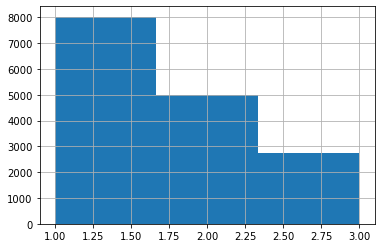

In [17]:
hp3["HP_Forbidden_clean"].hist(bins=3)

In [19]:
hp3.to_csv("HP_OHE_3class.csv")

In [24]:
smote = SMOTE(random_state=42)
X3,Y3=getXandY(hp3)
X_train3, X_test3, y_train3, y_test3 = trainTest(X3,Y3)
X_train_Smote3, y_train_Smote3 = smote.fit_resample(X_train3, y_train3)
print(sorted(Counter(y_train_Smote3).items()))

[(1.0, 5608), (2.0, 5608), (3.0, 5608)]


In [27]:
testModel(hp3,mrmrO,28,25)

  4%|▎         | 1/27 [00:08<03:40,  8.48s/it]

Index(['month'], dtype='object')
For 1 features: 
 Accuracy: 0.36456609378315297 
 Precision: 0.22880492341931366 
 Recall: 0.3421278220208768 
 F1 score: 0.26492146939801453
              precision    recall  f1-score   support

         1.0       0.50      0.55      0.52      2452
         2.0       0.00      0.00      0.00      1465
         3.0       0.17      0.44      0.25       796

    accuracy                           0.36      4713
   macro avg       0.22      0.33      0.26      4713
weighted avg       0.29      0.36      0.31      4713



  7%|▋         | 2/27 [00:15<03:09,  7.57s/it]

Index(['month', 'day'], dtype='object')
For 2 features: 
 Accuracy: 0.39807945612916934 
 Precision: 0.3852693614904143 
 Recall: 0.3817598616709755 
 F1 score: 0.35380731419731887
              precision    recall  f1-score   support

         1.0       0.55      0.46      0.50      2390
         2.0       0.39      0.28      0.33      1545
         3.0       0.19      0.40      0.26       772

    accuracy                           0.39      4707
   macro avg       0.38      0.38      0.36      4707
weighted avg       0.44      0.39      0.41      4707



 11%|█         | 3/27 [00:23<03:07,  7.83s/it]

Index(['month', 'day', 'year'], dtype='object')
For 3 features: 
 Accuracy: 0.5118315252074027 
 Precision: 0.45448827608958114 
 Recall: 0.4557793296720476 
 F1 score: 0.4538709030856769
              precision    recall  f1-score   support

         1.0       0.66      0.61      0.63      2388
         2.0       0.50      0.47      0.48      1524
         3.0       0.24      0.32      0.27       789

    accuracy                           0.52      4701
   macro avg       0.47      0.47      0.46      4701
weighted avg       0.54      0.52      0.52      4701



 15%|█▍        | 4/27 [00:32<03:10,  8.29s/it]

Index(['month', 'day', 'year', 'hour'], dtype='object')
For 4 features: 
 Accuracy: 0.5060702875399361 
 Precision: 0.4779303099521065 
 Recall: 0.4808629850765979 
 F1 score: 0.47061852096664747
              precision    recall  f1-score   support

         1.0       0.67      0.58      0.62      2345
         2.0       0.52      0.44      0.48      1525
         3.0       0.25      0.41      0.31       825

    accuracy                           0.50      4695
   macro avg       0.48      0.48      0.47      4695
weighted avg       0.55      0.50      0.52      4695



 19%|█▊        | 5/27 [00:42<03:12,  8.74s/it]

Index(['month', 'day', 'year', 'hour', 'minute'], dtype='object')
For 5 features: 
 Accuracy: 0.5107613563659629 
 Precision: 0.481503245289073 
 Recall: 0.48530489591567216 
 F1 score: 0.4745309846225537
              precision    recall  f1-score   support

         1.0       0.67      0.59      0.63      2380
         2.0       0.52      0.45      0.48      1474
         3.0       0.28      0.45      0.35       835

    accuracy                           0.52      4689
   macro avg       0.49      0.49      0.48      4689
weighted avg       0.55      0.52      0.53      4689



 22%|██▏       | 6/27 [00:51<03:11,  9.13s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday'], dtype='object')
For 6 features: 
 Accuracy: 0.5233568225496477 
 Precision: 0.48359655042216204 
 Recall: 0.4888523885667136 
 F1 score: 0.48167202880825344
              precision    recall  f1-score   support

         1.0       0.69      0.60      0.64      2484
         2.0       0.49      0.46      0.47      1392
         3.0       0.28      0.42      0.34       807

    accuracy                           0.53      4683
   macro avg       0.49      0.49      0.48      4683
weighted avg       0.56      0.53      0.54      4683



 26%|██▌       | 7/27 [01:02<03:12,  9.62s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek'], dtype='object')
For 7 features: 
 Accuracy: 0.5430831729741287 
 Precision: 0.5054742360294501 
 Recall: 0.5148074800454229 
 F1 score: 0.5042347718924326
              precision    recall  f1-score   support

         1.0       0.69      0.62      0.65      2395
         2.0       0.51      0.46      0.48      1449
         3.0       0.31      0.45      0.37       833

    accuracy                           0.54      4677
   macro avg       0.50      0.51      0.50      4677
weighted avg       0.57      0.54      0.55      4677



 30%|██▉       | 8/27 [01:13<03:11, 10.08s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature'],
      dtype='object')
For 8 features: 
 Accuracy: 0.5362962962962963 
 Precision: 0.5024347224039928 
 Recall: 0.5114382854813223 
 F1 score: 0.498718076109422
              precision    recall  f1-score   support

         1.0       0.70      0.59      0.64      2442
         2.0       0.49      0.44      0.46      1432
         3.0       0.27      0.44      0.33       797

    accuracy                           0.52      4671
   macro avg       0.49      0.49      0.48      4671
weighted avg       0.56      0.52      0.54      4671



 33%|███▎      | 9/27 [01:26<03:14, 10.79s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity'],
      dtype='object')
For 9 features: 
 Accuracy: 0.5358885316184352 
 Precision: 0.5046396966430011 
 Recall: 0.5143597175263229 
 F1 score: 0.5009241236033477
              precision    recall  f1-score   support

         1.0       0.69      0.59      0.64      2365
         2.0       0.51      0.47      0.49      1462
         3.0       0.31      0.48      0.38       838

    accuracy                           0.53      4665
   macro avg       0.50      0.51      0.50      4665
weighted avg       0.57      0.53      0.54      4665



 37%|███▋      | 10/27 [01:39<03:20, 11.77s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity', 'pressure'],
      dtype='object')
For 10 features: 
 Accuracy: 0.537171066752522 
 Precision: 0.5072742400326135 
 Recall: 0.518140297804956 
 F1 score: 0.5025031830109068
              precision    recall  f1-score   support

         1.0       0.71      0.59      0.65      2398
         2.0       0.50      0.45      0.47      1432
         3.0       0.30      0.49      0.37       829

    accuracy                           0.53      4659
   macro avg       0.50      0.51      0.50      4659
weighted avg       0.57      0.53      0.54      4659



 41%|████      | 11/27 [01:55<03:28, 13.02s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity', 'pressure', 'heavy intensity rain'],
      dtype='object')
For 11 features: 
 Accuracy: 0.5366172361917043 
 Precision: 0.5057639308317242 
 Recall: 0.5164802191026153 
 F1 score: 0.5016978031966423
              precision    recall  f1-score   support

         1.0       0.71      0.58      0.64      2420
         2.0       0.48      0.47      0.48      1434
         3.0       0.30      0.47      0.36       799

    accuracy                           0.53      4653
   macro avg       0.49      0.51      0.49      4653
weighted avg       0.57      0.53      0.54      4653



 44%|████▍     | 12/27 [02:10<03:24, 13.64s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity', 'pressure', 'heavy intensity rain',
       'light rain'],
      dtype='object')
For 12 features: 
 Accuracy: 0.5370432537120723 
 Precision: 0.5058430250886692 
 Recall: 0.5171150165509761 
 F1 score: 0.5023338420877422
              precision    recall  f1-score   support

         1.0       0.72      0.60      0.66      2350
         2.0       0.53      0.47      0.50      1474
         3.0       0.31      0.52      0.39       823

    accuracy                           0.55      4647
   macro avg       0.52      0.53      0.51      4647
weighted avg       0.59      0.55      0.56      4647



 48%|████▊     | 13/27 [02:25<03:14, 13.91s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity', 'pressure', 'heavy intensity rain',
       'light rain', 'broken clouds'],
      dtype='object')
For 13 features: 
 Accuracy: 0.5384443007972419 
 Precision: 0.5071572823219789 
 Recall: 0.518651391167583 
 F1 score: 0.5033839339683185
              precision    recall  f1-score   support

         1.0       0.70      0.59      0.64      2375
         2.0       0.51      0.46      0.48      1477
         3.0       0.29      0.49      0.36       789

    accuracy                           0.53      4641
   macro avg       0.50      0.51      0.50      4641
weighted avg       0.57      0.53      0.54      4641



 52%|█████▏    | 14/27 [02:40<03:06, 14.38s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity', 'pressure', 'heavy intensity rain',
       'light rain', 'broken clouds', 'scattered clouds'],
      dtype='object')
For 14 features: 
 Accuracy: 0.5388047464940668 
 Precision: 0.5067275544601214 
 Recall: 0.5175732783007502 
 F1 score: 0.5033438685270976
              precision    recall  f1-score   support

         1.0       0.71      0.61      0.66      2344
         2.0       0.51      0.46      0.48      1441
         3.0       0.31      0.49      0.38       850

    accuracy                           0.54      4635
   macro avg       0.51      0.52      0.51      4635
weighted avg       0.58      0.54      0.55      4635



 56%|█████▌    | 15/27 [02:56<02:55, 14.63s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity', 'pressure', 'heavy intensity rain',
       'light rain', 'broken clouds', 'scattered clouds',
       'thunderstorm with rain'],
      dtype='object')
For 15 features: 
 Accuracy: 0.5411881615899762 
 Precision: 0.5098075636399835 
 Recall: 0.5208890984242311 
 F1 score: 0.5062325876256557
              precision    recall  f1-score   support

         1.0       0.72      0.59      0.65      2353
         2.0       0.51      0.46      0.49      1488
         3.0       0.30      0.53      0.39       788

    accuracy                           0.54      4629
   macro avg       0.51      0.53      0.51      4629
weighted avg       0.58      0.54      0.55      4629



 59%|█████▉    | 16/27 [03:12<02:45, 15.08s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity', 'pressure', 'heavy intensity rain',
       'light rain', 'broken clouds', 'scattered clouds',
       'thunderstorm with rain', 'few clouds'],
      dtype='object')
For 16 features: 
 Accuracy: 0.5400475881462254 
 Precision: 0.5085037622248104 
 Recall: 0.5195745951054482 
 F1 score: 0.5050960304449277
              precision    recall  f1-score   support

         1.0       0.71      0.60      0.65      2351
         2.0       0.49      0.45      0.47      1454
         3.0       0.31      0.51      0.39       818

    accuracy                           0.53      4623
   macro avg       0.51      0.52      0.50      4623
weighted avg       0.57      0.53      0.55      4623



 63%|██████▎   | 17/27 [03:28<02:33, 15.39s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity', 'pressure', 'heavy intensity rain',
       'light rain', 'broken clouds', 'scattered clouds',
       'thunderstorm with rain', 'few clouds', 'thunderstorm'],
      dtype='object')
For 17 features: 
 Accuracy: 0.5416071041802036 
 Precision: 0.5093036812833968 
 Recall: 0.51925743862845 
 F1 score: 0.5055242333046324
              precision    recall  f1-score   support

         1.0       0.72      0.62      0.67      2394
         2.0       0.52      0.46      0.49      1428
         3.0       0.32      0.52      0.40       795

    accuracy                           0.55      4617
   macro avg       0.52      0.53      0.52      4617
weighted avg       0.59      0.55      0.57      4617



 67%|██████▋   | 18/27 [03:46<02:27, 16.36s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity', 'pressure', 'heavy intensity rain',
       'light rain', 'broken clouds', 'scattered clouds',
       'thunderstorm with rain', 'few clouds', 'thunderstorm', 'shower rain'],
      dtype='object')
For 18 features: 
 Accuracy: 0.5410973758403818 
 Precision: 0.5088922180977195 
 Recall: 0.5200698369442281 
 F1 score: 0.5052223615198601
              precision    recall  f1-score   support

         1.0       0.72      0.61      0.66      2356
         2.0       0.50      0.46      0.48      1431
         3.0       0.32      0.51      0.39       824

    accuracy                           0.54      4611
   macro avg       0.51      0.52      0.51      4611
weighted avg       0.58      0.54      0.55      4611



 70%|███████   | 19/27 [04:05<02:17, 17.13s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity', 'pressure', 'heavy intensity rain',
       'light rain', 'broken clouds', 'scattered clouds',
       'thunderstorm with rain', 'few clouds', 'thunderstorm', 'shower rain',
       'heavy intensity rain'],
      dtype='object')
For 19 features: 
 Accuracy: 0.5455114006514657 
 Precision: 0.5115642299510825 
 Recall: 0.52258388179488 
 F1 score: 0.5083698161476069
              precision    recall  f1-score   support

         1.0       0.72      0.60      0.65      2367
         2.0       0.51      0.47      0.49      1420
         3.0       0.31      0.50      0.38       818

    accuracy                           0.54      4605
   macro avg       0.51      0.52      0.51      4605
weighted avg       0.58      0.54      0.55      4605



 74%|███████▍  | 20/27 [04:26<02:07, 18.25s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity', 'pressure', 'heavy intensity rain',
       'light rain', 'broken clouds', 'scattered clouds',
       'thunderstorm with rain', 'few clouds', 'thunderstorm', 'shower rain',
       'heavy intensity rain', 'mist'],
      dtype='object')
For 20 features: 
 Accuracy: 0.5457708197434225 
 Precision: 0.5125161593535497 
 Recall: 0.5239868056385929 
 F1 score: 0.5096582048939149
              precision    recall  f1-score   support

         1.0       0.71      0.61      0.66      2355
         2.0       0.49      0.47      0.48      1427
         3.0       0.30      0.44      0.36       817

    accuracy                           0.54      4599
   macro avg       0.50      0.51      0.50      4599
weighted avg       0.57      0.54      0.55      4599



 78%|███████▊  | 21/27 [04:48<01:54, 19.16s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity', 'pressure', 'heavy intensity rain',
       'light rain', 'broken clouds', 'scattered clouds',
       'thunderstorm with rain', 'few clouds', 'thunderstorm', 'shower rain',
       'heavy intensity rain', 'mist', 'scattered clouds'],
      dtype='object')
For 21 features: 
 Accuracy: 0.546318310472458 
 Precision: 0.5113869942287637 
 Recall: 0.5229637274966235 
 F1 score: 0.5092124741361775
              precision    recall  f1-score   support

         1.0       0.72      0.63      0.67      2350
         2.0       0.49      0.45      0.47      1434
         3.0       0.32      0.50      0.39       809

    accuracy                           0.55      4593
   macro avg       0.51      0.52      0.51      4593
weighted avg       0.58      0.55      0.56      4593



 81%|████████▏ | 22/27 [05:14<01:46, 21.34s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity', 'pressure', 'heavy intensity rain',
       'light rain', 'broken clouds', 'scattered clouds',
       'thunderstorm with rain', 'few clouds', 'thunderstorm', 'shower rain',
       'heavy intensity rain', 'mist', 'scattered clouds', 'very heavy rain'],
      dtype='object')
For 22 features: 
 Accuracy: 0.5450708524089819 
 Precision: 0.5105089578621294 
 Recall: 0.5220935189636974 
 F1 score: 0.5080498141650984
              precision    recall  f1-score   support

         1.0       0.73      0.60      0.66      2385
         2.0       0.48      0.47      0.47      1413
         3.0       0.30      0.47      0.37       789

    accuracy                           0.54      4587
   macro avg       0.50      0.51      0.50      4587
weighted avg       0.58      0.54      0.55      4587



 85%|████████▌ | 23/27 [05:44<01:35, 23.93s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity', 'pressure', 'heavy intensity rain',
       'light rain', 'broken clouds', 'scattered clouds',
       'thunderstorm with rain', 'few clouds', 'thunderstorm', 'shower rain',
       'heavy intensity rain', 'mist', 'scattered clouds', 'very heavy rain',
       'overcast clouds'],
      dtype='object')
For 23 features: 
 Accuracy: 0.5435843702248417 
 Precision: 0.5089205146810297 
 Recall: 0.5199303952771934 
 F1 score: 0.5065073873630919
              precision    recall  f1-score   support

         1.0       0.73      0.61      0.67      2379
         2.0       0.50      0.47      0.48      1413
         3.0       0.31      0.49      0.38       789

    accuracy                           0.55      4581
   macro avg       0.51      0.52      0.51      4581
weighted avg       0.59      0.55      0.56      4581



 89%|████████▉ | 24/27 [06:18<01:21, 27.01s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity', 'pressure', 'heavy intensity rain',
       'light rain', 'broken clouds', 'scattered clouds',
       'thunderstorm with rain', 'few clouds', 'thunderstorm', 'shower rain',
       'heavy intensity rain', 'mist', 'scattered clouds', 'very heavy rain',
       'overcast clouds', 'moderate rain'],
      dtype='object')
For 24 features: 
 Accuracy: 0.5441136612021857 
 Precision: 0.5103772399994458 
 Recall: 0.522630431693081 
 F1 score: 0.5076302303748997
              precision    recall  f1-score   support

         1.0       0.74      0.62      0.67      2422
         2.0       0.50      0.46      0.48      1394
         3.0       0.30      0.51      0.38       759

    accuracy                           0.55      4575
   macro avg       0.51      0.53      0.51      4575
weighted avg       0.59      0.55      0.57      4575



 93%|█████████▎| 25/27 [06:53<00:58, 29.37s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity', 'pressure', 'heavy intensity rain',
       'light rain', 'broken clouds', 'scattered clouds',
       'thunderstorm with rain', 'few clouds', 'thunderstorm', 'shower rain',
       'heavy intensity rain', 'mist', 'scattered clouds', 'very heavy rain',
       'overcast clouds', 'moderate rain', 'minute'],
      dtype='object')
For 25 features: 
 Accuracy: 0.5451958853140731 
 Precision: 0.5098100415690295 
 Recall: 0.5209477112096413 
 F1 score: 0.5074460538471892
              precision    recall  f1-score   support

         1.0       0.71      0.60      0.65      2321
         2.0       0.47      0.47      0.47      1392
         3.0       0.34      0.49      0.41       856

    accuracy                           0.54      4569
   macro avg       0.51      0.52      0.51      4569
weighted avg       0.57      0.54      0.55      4569



 96%|█████████▋| 26/27 [07:33<00:32, 32.49s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity', 'pressure', 'heavy intensity rain',
       'light rain', 'broken clouds', 'scattered clouds',
       'thunderstorm with rain', 'few clouds', 'thunderstorm', 'shower rain',
       'heavy intensity rain', 'mist', 'scattered clouds', 'very heavy rain',
       'overcast clouds', 'moderate rain', 'minute', 'haze'],
      dtype='object')
For 26 features: 
 Accuracy: 0.5441595441595442 
 Precision: 0.5091239311133614 
 Recall: 0.5206295855946871 
 F1 score: 0.5062037137028279
              precision    recall  f1-score   support

         1.0       0.74      0.62      0.67      2456
         2.0       0.49      0.45      0.47      1374
         3.0       0.29      0.50      0.37       733

    accuracy                           0.55      4563
   macro avg       0.51      0.52      0.50      4563
weighted avg       0.59      0.55      0.56      4563



100%|██████████| 27/27 [08:17<00:00, 18.43s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity', 'pressure', 'heavy intensity rain',
       'light rain', 'broken clouds', 'scattered clouds',
       'thunderstorm with rain', 'few clouds', 'thunderstorm', 'shower rain',
       'heavy intensity rain', 'mist', 'scattered clouds', 'very heavy rain',
       'overcast clouds', 'moderate rain', 'minute', 'haze', 'few clouds'],
      dtype='object')
For 27 features: 
 Accuracy: 0.5425938117182356 
 Precision: 0.5098331260459068 
 Recall: 0.5218622600419704 
 F1 score: 0.5062702730331372
              precision    recall  f1-score   support

         1.0       0.73      0.60      0.66      2356
         2.0       0.51      0.45      0.48      1417
         3.0       0.32      0.55      0.41       784

    accuracy                           0.55      4557
   macro avg       0.52      0.54      0.51      4557
weighted avg       0.59      0.55      0.56      4557



In [28]:
testModel(hp3,mrmrO,28,100)

  4%|▎         | 1/27 [00:24<10:37, 24.53s/it]

Index(['month'], dtype='object')
For 1 features: 
 Accuracy: 0.36921775433970555 
 Precision: 0.23475123011954474 
 Recall: 0.3459376952561906 
 F1 score: 0.26842420613709517
              precision    recall  f1-score   support

         1.0       0.53      0.55      0.54      2433
         2.0       0.00      0.00      0.00      1328
         3.0       0.20      0.51      0.29       790

    accuracy                           0.38      4551
   macro avg       0.24      0.35      0.27      4551
weighted avg       0.32      0.38      0.34      4551



  7%|▋         | 2/27 [00:49<10:13, 24.53s/it]

Index(['month', 'day'], dtype='object')
For 2 features: 
 Accuracy: 0.39625082508250825 
 Precision: 0.37388803965017287 
 Recall: 0.3770895470269595 
 F1 score: 0.34210441265888214
              precision    recall  f1-score   support

         1.0       0.57      0.56      0.57      2324
         2.0       0.30      0.04      0.07      1418
         3.0       0.21      0.53      0.30       803

    accuracy                           0.39      4545
   macro avg       0.36      0.38      0.31      4545
weighted avg       0.42      0.39      0.37      4545



 11%|█         | 3/27 [01:20<11:03, 27.65s/it]

Index(['month', 'day', 'year'], dtype='object')
For 3 features: 
 Accuracy: 0.5136109275170743 
 Precision: 0.44605878406077204 
 Recall: 0.4499780286942305 
 F1 score: 0.44642938847870767
              precision    recall  f1-score   support

         1.0       0.67      0.60      0.64      2400
         2.0       0.46      0.55      0.50      1332
         3.0       0.23      0.22      0.22       807

    accuracy                           0.52      4539
   macro avg       0.45      0.46      0.45      4539
weighted avg       0.53      0.52      0.52      4539



 15%|█▍        | 4/27 [01:57<12:04, 31.49s/it]

Index(['month', 'day', 'year', 'hour'], dtype='object')
For 4 features: 
 Accuracy: 0.5054268696227664 
 Precision: 0.47689209633582547 
 Recall: 0.48032522133281497 
 F1 score: 0.46902005001229696
              precision    recall  f1-score   support

         1.0       0.68      0.59      0.63      2362
         2.0       0.51      0.44      0.47      1412
         3.0       0.25      0.43      0.31       759

    accuracy                           0.51      4533
   macro avg       0.48      0.48      0.47      4533
weighted avg       0.56      0.51      0.53      4533



 19%|█▊        | 5/27 [02:39<12:51, 35.08s/it]

Index(['month', 'day', 'year', 'hour', 'minute'], dtype='object')
For 5 features: 
 Accuracy: 0.5046896399381489 
 Precision: 0.4761642644884492 
 Recall: 0.4794117493567907 
 F1 score: 0.4681538749356143
              precision    recall  f1-score   support

         1.0       0.67      0.58      0.62      2299
         2.0       0.51      0.44      0.47      1407
         3.0       0.27      0.44      0.34       821

    accuracy                           0.51      4527
   macro avg       0.48      0.49      0.48      4527
weighted avg       0.55      0.51      0.52      4527



 22%|██▏       | 6/27 [03:23<13:20, 38.11s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday'], dtype='object')
For 6 features: 
 Accuracy: 0.521933200619332 
 Precision: 0.48171123302452845 
 Recall: 0.4875542271205914 
 F1 score: 0.4793954739053336
              precision    recall  f1-score   support

         1.0       0.68      0.59      0.63      2324
         2.0       0.50      0.46      0.48      1434
         3.0       0.26      0.40      0.31       763

    accuracy                           0.52      4521
   macro avg       0.48      0.48      0.47      4521
weighted avg       0.55      0.52      0.53      4521



 26%|██▌       | 7/27 [04:09<13:34, 40.72s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek'], dtype='object')
For 7 features: 
 Accuracy: 0.5425891472868217 
 Precision: 0.5043681500459413 
 Recall: 0.5147140793813708 
 F1 score: 0.5033936784001105
              precision    recall  f1-score   support

         1.0       0.72      0.62      0.67      2335
         2.0       0.51      0.47      0.49      1387
         3.0       0.32      0.51      0.39       793

    accuracy                           0.55      4515
   macro avg       0.52      0.53      0.52      4515
weighted avg       0.59      0.55      0.57      4515



 30%|██▉       | 8/27 [05:02<14:10, 44.75s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature'],
      dtype='object')
For 8 features: 
 Accuracy: 0.5433932135728543 
 Precision: 0.5076029308344455 
 Recall: 0.5187469598891564 
 F1 score: 0.5050471901684267
              precision    recall  f1-score   support

         1.0       0.72      0.60      0.65      2377
         2.0       0.49      0.47      0.48      1359
         3.0       0.29      0.46      0.36       773

    accuracy                           0.54      4509
   macro avg       0.50      0.51      0.50      4509
weighted avg       0.58      0.54      0.55      4509



 33%|███▎      | 9/27 [06:02<14:48, 49.34s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity'],
      dtype='object')
For 9 features: 
 Accuracy: 0.537981345769487 
 Precision: 0.5058255878883045 
 Recall: 0.5166811424777563 
 F1 score: 0.502023115403859
              precision    recall  f1-score   support

         1.0       0.70      0.60      0.64      2334
         2.0       0.50      0.46      0.48      1360
         3.0       0.31      0.48      0.38       809

    accuracy                           0.54      4503
   macro avg       0.50      0.51      0.50      4503
weighted avg       0.57      0.54      0.55      4503



 37%|███▋      | 10/27 [07:24<16:53, 59.61s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity', 'pressure'],
      dtype='object')
For 10 features: 
 Accuracy: 0.535127863019791 
 Precision: 0.5042614875837853 
 Recall: 0.5151243123206685 
 F1 score: 0.4995752289018672
              precision    recall  f1-score   support

         1.0       0.73      0.59      0.65      2357
         2.0       0.49      0.47      0.48      1380
         3.0       0.29      0.50      0.37       760

    accuracy                           0.53      4497
   macro avg       0.50      0.52      0.50      4497
weighted avg       0.58      0.53      0.55      4497



 41%|████      | 11/27 [09:05<19:15, 72.20s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity', 'pressure', 'heavy intensity rain'],
      dtype='object')
For 11 features: 
 Accuracy: 0.5367423736361612 
 Precision: 0.5053089002679847 
 Recall: 0.5166640800664614 
 F1 score: 0.5010922077255711
              precision    recall  f1-score   support

         1.0       0.73      0.60      0.66      2345
         2.0       0.49      0.46      0.48      1384
         3.0       0.31      0.52      0.39       762

    accuracy                           0.54      4491
   macro avg       0.51      0.53      0.51      4491
weighted avg       0.59      0.54      0.56      4491



 44%|████▍     | 12/27 [10:36<19:27, 77.84s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity', 'pressure', 'heavy intensity rain',
       'light rain'],
      dtype='object')
For 12 features: 
 Accuracy: 0.5380891861761427 
 Precision: 0.5059776388746815 
 Recall: 0.5180557592345444 
 F1 score: 0.5021874948254871
              precision    recall  f1-score   support

         1.0       0.73      0.59      0.65      2374
         2.0       0.49      0.45      0.47      1374
         3.0       0.30      0.52      0.38       737

    accuracy                           0.54      4485
   macro avg       0.51      0.52      0.50      4485
weighted avg       0.59      0.54      0.55      4485



 48%|████▊     | 13/27 [12:14<19:35, 83.98s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity', 'pressure', 'heavy intensity rain',
       'light rain', 'broken clouds'],
      dtype='object')
For 13 features: 
 Accuracy: 0.5394820272382228 
 Precision: 0.5070074955876174 
 Recall: 0.5189662085174094 
 F1 score: 0.503270518422468
              precision    recall  f1-score   support

         1.0       0.73      0.61      0.66      2358
         2.0       0.48      0.47      0.47      1343
         3.0       0.31      0.48      0.37       778

    accuracy                           0.54      4479
   macro avg       0.51      0.52      0.50      4479
weighted avg       0.58      0.54      0.56      4479



 52%|█████▏    | 14/27 [13:48<18:53, 87.17s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity', 'pressure', 'heavy intensity rain',
       'light rain', 'broken clouds', 'scattered clouds'],
      dtype='object')
For 14 features: 
 Accuracy: 0.5385870780236978 
 Precision: 0.506069196104886 
 Recall: 0.5183266159426452 
 F1 score: 0.502290625801574
              precision    recall  f1-score   support

         1.0       0.74      0.63      0.68      2352
         2.0       0.49      0.46      0.47      1376
         3.0       0.31      0.50      0.38       745

    accuracy                           0.55      4473
   macro avg       0.51      0.53      0.51      4473
weighted avg       0.59      0.55      0.57      4473



 56%|█████▌    | 15/27 [15:47<19:18, 96.55s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity', 'pressure', 'heavy intensity rain',
       'light rain', 'broken clouds', 'scattered clouds',
       'thunderstorm with rain'],
      dtype='object')
For 15 features: 
 Accuracy: 0.5395321244683232 
 Precision: 0.5067825954222744 
 Recall: 0.5190343944245289 
 F1 score: 0.5032151673787058
              precision    recall  f1-score   support

         1.0       0.75      0.61      0.67      2384
         2.0       0.50      0.48      0.49      1322
         3.0       0.31      0.51      0.39       761

    accuracy                           0.55      4467
   macro avg       0.52      0.53      0.52      4467
weighted avg       0.60      0.55      0.57      4467



 59%|█████▉    | 16/27 [17:44<18:50, 102.79s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity', 'pressure', 'heavy intensity rain',
       'light rain', 'broken clouds', 'scattered clouds',
       'thunderstorm with rain', 'few clouds'],
      dtype='object')
For 16 features: 
 Accuracy: 0.5381102891728312 
 Precision: 0.5050604279224096 
 Recall: 0.5172479298002279 
 F1 score: 0.5017954976733792
              precision    recall  f1-score   support

         1.0       0.71      0.59      0.64      2316
         2.0       0.47      0.45      0.46      1343
         3.0       0.32      0.51      0.39       802

    accuracy                           0.53      4461
   macro avg       0.50      0.51      0.50      4461
weighted avg       0.57      0.53      0.54      4461



 63%|██████▎   | 17/27 [19:37<17:40, 106.02s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity', 'pressure', 'heavy intensity rain',
       'light rain', 'broken clouds', 'scattered clouds',
       'thunderstorm with rain', 'few clouds', 'thunderstorm'],
      dtype='object')
For 17 features: 
 Accuracy: 0.5404242424242425 
 Precision: 0.5072891998055216 
 Recall: 0.5189120458878476 
 F1 score: 0.5034014307360283
              precision    recall  f1-score   support

         1.0       0.74      0.61      0.67      2349
         2.0       0.49      0.44      0.46      1335
         3.0       0.30      0.51      0.38       771

    accuracy                           0.54      4455
   macro avg       0.51      0.52      0.50      4455
weighted avg       0.59      0.54      0.56      4455



 67%|██████▋   | 18/27 [21:45<16:53, 112.56s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity', 'pressure', 'heavy intensity rain',
       'light rain', 'broken clouds', 'scattered clouds',
       'thunderstorm with rain', 'few clouds', 'thunderstorm', 'shower rain'],
      dtype='object')
For 18 features: 
 Accuracy: 0.5435963137783771 
 Precision: 0.5093703323504665 
 Recall: 0.5212028185475122 
 F1 score: 0.5061853959080284
              precision    recall  f1-score   support

         1.0       0.73      0.61      0.67      2359
         2.0       0.47      0.45      0.46      1306
         3.0       0.34      0.53      0.41       784

    accuracy                           0.55      4449
   macro avg       0.51      0.53      0.51      4449
weighted avg       0.59      0.55      0.56      4449



 70%|███████   | 19/27 [23:52<15:34, 116.77s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity', 'pressure', 'heavy intensity rain',
       'light rain', 'broken clouds', 'scattered clouds',
       'thunderstorm with rain', 'few clouds', 'thunderstorm', 'shower rain',
       'heavy intensity rain'],
      dtype='object')
For 19 features: 
 Accuracy: 0.5437474679270763 
 Precision: 0.508937943593244 
 Recall: 0.5205190953744088 
 F1 score: 0.5059393525571623
              precision    recall  f1-score   support

         1.0       0.73      0.61      0.67      2314
         2.0       0.47      0.44      0.45      1328
         3.0       0.31      0.50      0.38       801

    accuracy                           0.54      4443
   macro avg       0.51      0.52      0.50      4443
weighted avg       0.58      0.54      0.55      4443



 74%|███████▍  | 20/27 [26:08<14:19, 122.74s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity', 'pressure', 'heavy intensity rain',
       'light rain', 'broken clouds', 'scattered clouds',
       'thunderstorm with rain', 'few clouds', 'thunderstorm', 'shower rain',
       'heavy intensity rain', 'mist'],
      dtype='object')
For 20 features: 
 Accuracy: 0.5440703177822853 
 Precision: 0.5093466077530077 
 Recall: 0.521274323377329 
 F1 score: 0.5060269113855546
              precision    recall  f1-score   support

         1.0       0.72      0.61      0.66      2292
         2.0       0.48      0.45      0.46      1338
         3.0       0.32      0.48      0.38       807

    accuracy                           0.54      4437
   macro avg       0.50      0.51      0.50      4437
weighted avg       0.57      0.54      0.55      4437



 78%|███████▊  | 21/27 [28:27<12:44, 127.43s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity', 'pressure', 'heavy intensity rain',
       'light rain', 'broken clouds', 'scattered clouds',
       'thunderstorm with rain', 'few clouds', 'thunderstorm', 'shower rain',
       'heavy intensity rain', 'mist', 'scattered clouds'],
      dtype='object')
For 21 features: 
 Accuracy: 0.5428345745881291 
 Precision: 0.508523517822869 
 Recall: 0.5205623568088396 
 F1 score: 0.5052376208594542
              precision    recall  f1-score   support

         1.0       0.74      0.61      0.67      2361
         2.0       0.48      0.43      0.45      1313
         3.0       0.31      0.53      0.39       757

    accuracy                           0.54      4431
   macro avg       0.51      0.52      0.50      4431
weighted avg       0.59      0.54      0.56      4431



 81%|████████▏ | 22/27 [31:39<12:13, 146.75s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity', 'pressure', 'heavy intensity rain',
       'light rain', 'broken clouds', 'scattered clouds',
       'thunderstorm with rain', 'few clouds', 'thunderstorm', 'shower rain',
       'heavy intensity rain', 'mist', 'scattered clouds', 'very heavy rain'],
      dtype='object')
For 22 features: 
 Accuracy: 0.5440316384180791 
 Precision: 0.5089458125329371 
 Recall: 0.5211594886419191 
 F1 score: 0.5060363326981684
              precision    recall  f1-score   support

         1.0       0.73      0.60      0.66      2321
         2.0       0.47      0.47      0.47      1296
         3.0       0.32      0.48      0.38       808

    accuracy                           0.54      4425
   macro avg       0.51      0.52      0.50      4425
weighted avg       0.58      0.54      0.55      4425



 85%|████████▌ | 23/27 [34:54<10:45, 161.44s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity', 'pressure', 'heavy intensity rain',
       'light rain', 'broken clouds', 'scattered clouds',
       'thunderstorm with rain', 'few clouds', 'thunderstorm', 'shower rain',
       'heavy intensity rain', 'mist', 'scattered clouds', 'very heavy rain',
       'overcast clouds'],
      dtype='object')
For 23 features: 
 Accuracy: 0.5431568228105906 
 Precision: 0.5080601941541039 
 Recall: 0.5202158475796345 
 F1 score: 0.5050590592491919
              precision    recall  f1-score   support

         1.0       0.73      0.60      0.66      2277
         2.0       0.49      0.45      0.47      1364
         3.0       0.31      0.50      0.38       778

    accuracy                           0.54      4419
   macro avg       0.51      0.52      0.50      4419
weighted avg       0.58      0.54      0.55      4419



 89%|████████▉ | 24/27 [38:05<08:30, 170.18s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity', 'pressure', 'heavy intensity rain',
       'light rain', 'broken clouds', 'scattered clouds',
       'thunderstorm with rain', 'few clouds', 'thunderstorm', 'shower rain',
       'heavy intensity rain', 'mist', 'scattered clouds', 'very heavy rain',
       'overcast clouds', 'moderate rain'],
      dtype='object')
For 24 features: 
 Accuracy: 0.5443711760707002 
 Precision: 0.5087058074933615 
 Recall: 0.5210994819960864 
 F1 score: 0.50596994454382
              precision    recall  f1-score   support

         1.0       0.74      0.63      0.68      2326
         2.0       0.48      0.47      0.47      1298
         3.0       0.34      0.50      0.40       789

    accuracy                           0.56      4413
   macro avg       0.52      0.53      0.52      4413
weighted avg       0.59      0.56      0.57      4413



 93%|█████████▎| 25/27 [41:47<06:11, 185.66s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity', 'pressure', 'heavy intensity rain',
       'light rain', 'broken clouds', 'scattered clouds',
       'thunderstorm with rain', 'few clouds', 'thunderstorm', 'shower rain',
       'heavy intensity rain', 'mist', 'scattered clouds', 'very heavy rain',
       'overcast clouds', 'moderate rain', 'minute'],
      dtype='object')
For 25 features: 
 Accuracy: 0.5439142273655548 
 Precision: 0.5076042073535144 
 Recall: 0.5193548045486798 
 F1 score: 0.5046353424923841
              precision    recall  f1-score   support

         1.0       0.73      0.62      0.67      2319
         2.0       0.48      0.46      0.47      1312
         3.0       0.31      0.47      0.37       776

    accuracy                           0.55      4407
   macro avg       0.51      0.52      0.50      4407
weighted avg       0.58      0.55      0.56      4407



 96%|█████████▋| 26/27 [45:36<03:18, 198.72s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity', 'pressure', 'heavy intensity rain',
       'light rain', 'broken clouds', 'scattered clouds',
       'thunderstorm with rain', 'few clouds', 'thunderstorm', 'shower rain',
       'heavy intensity rain', 'mist', 'scattered clouds', 'very heavy rain',
       'overcast clouds', 'moderate rain', 'minute', 'haze'],
      dtype='object')
For 26 features: 
 Accuracy: 0.5430084071801863 
 Precision: 0.5070082624816481 
 Recall: 0.5188260836774491 
 F1 score: 0.504252546800881
              precision    recall  f1-score   support

         1.0       0.74      0.62      0.67      2328
         2.0       0.48      0.43      0.46      1292
         3.0       0.32      0.53      0.40       781

    accuracy                           0.55      4401
   macro avg       0.51      0.53      0.51      4401
weighted avg       0.59      0.55      0.56      4401



100%|██████████| 27/27 [49:32<00:00, 110.10s/it]

Index(['month', 'day', 'year', 'hour', 'minute', 'holiday', 'dayOfTheWeek',
       'temperature', 'humidity', 'pressure', 'heavy intensity rain',
       'light rain', 'broken clouds', 'scattered clouds',
       'thunderstorm with rain', 'few clouds', 'thunderstorm', 'shower rain',
       'heavy intensity rain', 'mist', 'scattered clouds', 'very heavy rain',
       'overcast clouds', 'moderate rain', 'minute', 'haze', 'few clouds'],
      dtype='object')
For 27 features: 
 Accuracy: 0.5423344709897611 
 Precision: 0.5067187326440314 
 Recall: 0.5187137456132549 
 F1 score: 0.5038905894849609
              precision    recall  f1-score   support

         1.0       0.72      0.60      0.65      2287
         2.0       0.45      0.43      0.44      1301
         3.0       0.33      0.53      0.41       807

    accuracy                           0.53      4395
   macro avg       0.50      0.52      0.50      4395
weighted avg       0.57      0.53      0.55      4395

